# Car breakdown prediction

We have a fleet of automatic cars of same make & model. Since the drivers don't own the cars, they driver it abusively, which causes more wear and tear. All cars are equipped with sensors to provide the sate of the car on a daily basis (1 reading / day).


1. **Driving Mode sensors:**
The car has 3 different driving modes(Auto, City, Sports), which can be selected only once by the driver on a daily basis. The sensors though are not discrete and is captured as 3 different real numbers, captured as **ecoMode, cityMode, sportsMode**

2. **Engine Sensors**: 
Every is equipped with 21 different kind of sensors. (E.g. engine-rpm, engine-oil level, ac temperature, battery voltage, ...), captured as **s1, s2, s3, ..., s21**

## Dataset

[Car breakdown dataset](car_breakdown_data.ipynb)

# What to predict ?

Given a timeseries data for every **vehicleId** and the day of failure. Can we predict that the break down is going to happen withing 30 days.

## Expectations from the project

* Implementation with a decent accuracy, e.g. 70%
* Checkin the code to github, and email the link
* README.md should capture your approach of implementation
* Document various other techniques which can be used to address the problem, given only the data which is provided in this project.

In [145]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [147]:
train_data = pd.read_csv('data/car_breakdown_train.tsv', sep='\t', header=0)
train_data.head()

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [148]:
train_data

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
5,1,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669
6,1,7,0.0010,0.0001,100,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100,39.10,23.3774
7,1,8,-0.0034,0.0003,100,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100,38.97,23.3106
8,1,9,0.0008,0.0001,100,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100,39.05,23.4066
9,1,10,-0.0033,0.0001,100,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100,38.95,23.4694


In [149]:
train_data.shape

(20631, 26)

In [150]:
non_imp_features = []
for i in range(len(train_data.columns)):
    print(train_data.columns[i],train_data.iloc[:,i].nunique())
    if train_data.iloc[:,i].nunique() == 1:
        non_imp_features.append(train_data.columns[i])

vehicleId 100
days 362
ecoMode 158
cityMode 13
sportMode 1
s1 1
s2 310
s3 3012
s4 4051
s5 1
s6 2
s7 513
s8 53
s9 6403
s10 1
s11 159
s12 427
s13 56
s14 6078
s15 1918
s16 1
s17 13
s18 1
s19 1
s20 120
s21 4745


In [151]:
non_imp_features

['sportMode', 's1', 's5', 's10', 's16', 's18', 's19']

In [152]:
non_imp_features.extend(['is_carbrokedown','RUL','car_brokedown_day','vehicleId'])

In [153]:
features_to_keep = list(set(train_data.columns) - set(non_imp_features)) 

In [154]:
features_to_keep,len(features_to_keep)

(['s7',
  's15',
  's12',
  's13',
  's11',
  's3',
  's2',
  's21',
  's4',
  's17',
  's20',
  'cityMode',
  's14',
  'ecoMode',
  's9',
  's6',
  's8',
  'days'],
 18)

## Solve this problem as classification, to predict if car will breakdown in next 30 days
### we will create Y label, as car_breakdown to denote the same

In [155]:
vehicle_brokedown_day_dict = train_data.groupby('vehicleId')["days"].max().to_dict()

In [156]:
train_data['car_brokedown_day'] = train_data.vehicleId.apply(lambda x:vehicle_brokedown_day_dict[x])

In [157]:
train_data.sample(5)

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,car_brokedown_day
4452,22,90,0.0035,0.0005,100,518.67,642.76,1590.13,1413.89,14.62,21.61,552.15,2388.19,9049.77,1.3,47.65,521.34,2388.18,8123.74,8.4474,0.03,394,2388,100,38.67,23.2794,202
4339,21,172,-0.0008,-0.0001,100,518.67,642.73,1601.24,1419.57,14.62,21.61,552.88,2388.16,9110.58,1.3,47.72,520.32,2388.16,8181.55,8.4629,0.03,395,2388,100,38.69,23.2232,195
7069,36,82,0.0000,0.0000,100,518.67,642.32,1592.11,1415.33,14.62,21.61,552.38,2388.15,9062.90,1.3,47.65,521.54,2388.11,8141.27,8.4499,0.03,392,2388,100,38.85,23.3256,158
6667,34,56,-0.0042,-0.0002,100,518.67,642.31,1589.15,1407.03,14.62,21.61,553.37,2388.06,9065.04,1.3,47.36,521.92,2388.07,8140.82,8.4042,0.03,393,2388,100,38.86,23.3543,195
10982,56,3,0.0012,-0.0004,100,518.67,642.47,1584.96,1410.81,14.62,21.61,552.90,2388.12,9057.99,1.3,47.42,520.82,2388.08,8133.11,8.4461,0.03,394,2388,100,38.82,23.3340,275


In [158]:
train_data['RUL'] = train_data.apply(lambda x: int(x['car_brokedown_day'] - x['days']),axis=1)

In [159]:
train_data.sample(5)

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,car_brokedown_day,RUL
19039,94,29,0.0020,-0.0003,100,518.67,642.92,1596.64,1407.04,14.62,21.61,553.28,2388.14,9041.21,1.3,47.56,521.16,2388.14,8124.60,8.4462,0.03,393,2388,100,38.65,23.3360,258,229
13765,69,135,-0.0012,-0.0004,100,518.67,642.06,1588.63,1402.66,14.62,21.61,553.91,2388.06,9057.13,1.3,47.35,521.93,2388.10,8138.30,8.4278,0.03,391,2388,100,38.89,23.3185,362,227
10835,55,49,0.0002,0.0000,100,518.67,642.50,1590.36,1408.59,14.62,21.61,554.29,2388.09,9049.58,1.3,47.34,521.82,2388.06,8131.38,8.4210,0.03,393,2388,100,38.92,23.2912,193,144
17902,88,107,-0.0018,0.0002,100,518.67,642.42,1587.09,1412.92,14.62,21.61,553.45,2388.05,9073.94,1.3,47.50,522.20,2388.02,8156.78,8.4032,0.03,393,2388,100,39.17,23.3936,213,106
11097,56,118,-0.0006,0.0001,100,518.67,643.03,1584.89,1406.91,14.62,21.61,553.20,2388.13,9062.18,1.3,47.56,521.09,2388.11,8137.21,8.4500,0.03,394,2388,100,38.94,23.3016,275,157


In [163]:
train_data[train_data.vehicleId==1]

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,car_brokedown_day,RUL,is_carbrokedown
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,0
5,1,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669,192,186,0
6,1,7,0.0010,0.0001,100,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100,39.10,23.3774,192,185,0
7,1,8,-0.0034,0.0003,100,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100,38.97,23.3106,192,184,0
8,1,9,0.0008,0.0001,100,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100,39.05,23.4066,192,183,0
9,1,10,-0.0033,0.0001,100,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100,38.95,23.4694,192,182,0


In [161]:
train_data['is_carbrokedown'] = train_data.RUL.apply(lambda x: 1 if x <=30 else 0)

In [164]:
train_data.is_carbrokedown.value_counts()

0    17531
1     3100
Name: is_carbrokedown, dtype: int64

## create test data

In [165]:
valid_data = pd.read_csv('data/car_breakdown_test.tsv',sep='\t',header=0)

In [166]:
valid_data.head()

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [167]:
valid_data_gt = pd.read_csv('data/car_breakdown_test_truth.tsv',sep='\t',header=0)

In [168]:
valid_data_gt.head(),valid_data_gt.vehicleId.nunique(),valid_data.vehicleId.nunique()

(   vehicleId  RUL
 0          1  112
 1          2   98
 2          3   69
 3          4   82
 4          5   91, 100, 100)

In [169]:
valid_vechicle_id_car_rul_dict = valid_data_gt.set_index('vehicleId')['RUL'].to_dict()

In [170]:
valid_vechicle_id_car_rul_dict

{1: 112,
 2: 98,
 3: 69,
 4: 82,
 5: 91,
 6: 93,
 7: 91,
 8: 95,
 9: 111,
 10: 96,
 11: 97,
 12: 124,
 13: 95,
 14: 107,
 15: 83,
 16: 84,
 17: 50,
 18: 28,
 19: 87,
 20: 16,
 21: 57,
 22: 111,
 23: 113,
 24: 20,
 25: 145,
 26: 119,
 27: 66,
 28: 97,
 29: 90,
 30: 115,
 31: 8,
 32: 48,
 33: 106,
 34: 7,
 35: 11,
 36: 19,
 37: 21,
 38: 50,
 39: 142,
 40: 28,
 41: 18,
 42: 10,
 43: 59,
 44: 109,
 45: 114,
 46: 47,
 47: 135,
 48: 92,
 49: 21,
 50: 79,
 51: 114,
 52: 29,
 53: 26,
 54: 97,
 55: 137,
 56: 15,
 57: 103,
 58: 37,
 59: 114,
 60: 100,
 61: 21,
 62: 54,
 63: 72,
 64: 28,
 65: 128,
 66: 14,
 67: 77,
 68: 8,
 69: 121,
 70: 94,
 71: 118,
 72: 50,
 73: 131,
 74: 126,
 75: 113,
 76: 10,
 77: 34,
 78: 107,
 79: 63,
 80: 90,
 81: 8,
 82: 9,
 83: 137,
 84: 58,
 85: 118,
 86: 89,
 87: 116,
 88: 115,
 89: 136,
 90: 28,
 91: 38,
 92: 20,
 93: 85,
 94: 55,
 95: 128,
 96: 137,
 97: 82,
 98: 59,
 99: 117,
 100: 20}

In [171]:
valid_data['RUL'] = valid_data.apply(lambda x: int(valid_vechicle_id_car_rul_dict[x['vehicleId']] - x['days']+1),axis=1)

In [172]:
valid_data[valid_data.vehicleId==10]

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
896,10,1,-0.0017,0.0000,100,518.67,642.07,1584.19,1403.69,14.62,21.61,554.53,2388.01,9057.35,1.3,47.32,522.13,2388.01,8145.46,8.4039,0.03,391,2388,100,38.75,23.3530,96
897,10,2,0.0061,-0.0001,100,518.67,642.32,1584.48,1388.37,14.62,21.61,554.43,2387.98,9061.92,1.3,47.17,522.59,2388.03,8146.38,8.3981,0.03,392,2388,100,39.08,23.4908,95
898,10,3,0.0027,-0.0003,100,518.67,641.77,1574.22,1400.07,14.62,21.60,554.38,2388.04,9058.28,1.3,46.95,522.22,2388.00,8141.22,8.3763,0.03,391,2388,100,39.31,23.4285,94
899,10,4,-0.0028,-0.0004,100,518.67,642.83,1583.90,1404.20,14.62,21.61,554.50,2388.04,9061.39,1.3,47.45,521.93,2387.97,8144.96,8.4250,0.03,392,2388,100,39.04,23.3622,93
900,10,5,0.0013,-0.0002,100,518.67,642.04,1585.22,1403.50,14.62,21.60,554.52,2388.01,9071.21,1.3,47.34,522.28,2388.00,8142.12,8.4127,0.03,391,2388,100,38.94,23.4059,92
901,10,6,-0.0007,-0.0001,100,518.67,641.87,1583.49,1395.45,14.62,21.61,554.44,2388.02,9057.80,1.3,47.35,522.24,2387.98,8141.46,8.3845,0.03,392,2388,100,38.78,23.3883,91
902,10,7,0.0006,-0.0002,100,518.67,642.02,1580.84,1398.72,14.62,21.61,553.42,2387.96,9060.98,1.3,47.33,521.97,2388.00,8148.30,8.3737,0.03,392,2388,100,39.15,23.4004,90
903,10,8,0.0024,0.0002,100,518.67,641.62,1583.96,1399.01,14.62,21.61,554.99,2387.99,9060.89,1.3,47.10,521.89,2388.05,8142.62,8.3911,0.03,391,2388,100,38.98,23.5230,89
904,10,9,-0.0006,-0.0004,100,518.67,642.21,1586.17,1398.14,14.62,21.61,554.78,2388.01,9063.92,1.3,47.24,522.91,2388.00,8142.14,8.4140,0.03,393,2388,100,38.99,23.4151,88
905,10,10,-0.0008,-0.0005,100,518.67,641.77,1584.88,1391.26,14.62,21.61,555.02,2388.02,9061.13,1.3,47.14,522.42,2388.04,8142.58,8.3729,0.03,389,2388,100,39.12,23.3973,87


In [173]:
valid_data['is_carbrokedown'] = valid_data.RUL.apply(lambda x: 1 if x <=30 else 0)

In [174]:
valid_data[valid_data['is_carbrokedown']==True].head(10)

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,is_carbrokedown
119,3,40,-0.0004,-0.0005,100,518.67,642.52,1588.58,1407.30,14.62,21.61,553.38,2388.16,9053.33,1.3,47.57,521.66,2388.18,8132.02,8.4341,0.03,393,2388,100,38.73,23.3030,30,1
120,3,41,-0.0047,-0.0005,100,518.67,642.94,1596.70,1406.09,14.62,21.61,553.78,2388.15,9048.09,1.3,47.49,521.34,2388.12,8137.15,8.4601,0.03,393,2388,100,38.85,23.4000,29,1
121,3,42,-0.0011,-0.0004,100,518.67,642.74,1590.47,1415.23,14.62,21.61,552.79,2388.13,9051.32,1.3,47.36,521.37,2388.10,8134.08,8.4292,0.03,393,2388,100,38.75,23.3120,28,1
122,3,43,0.0017,0.0001,100,518.67,643.02,1589.26,1413.20,14.62,21.61,553.34,2388.11,9052.23,1.3,47.50,521.59,2388.10,8134.12,8.4194,0.03,394,2388,100,38.84,23.4232,27,1
123,3,44,-0.0019,0.0000,100,518.67,642.16,1586.46,1410.72,14.62,21.61,552.95,2388.13,9055.43,1.3,47.59,521.77,2388.14,8133.77,8.4204,0.03,394,2388,100,38.74,23.3035,26,1
124,3,45,0.0003,-0.0004,100,518.67,642.55,1588.36,1405.75,14.62,21.61,552.30,2388.13,9058.30,1.3,47.57,521.00,2388.14,8125.84,8.4227,0.03,394,2388,100,38.86,23.3064,25,1
125,3,46,-0.0006,-0.0002,100,518.67,642.45,1587.99,1401.94,14.62,21.61,553.75,2388.09,9055.86,1.3,47.55,521.21,2388.09,8127.02,8.4210,0.03,393,2388,100,38.83,23.1494,24,1
126,3,47,0.0015,-0.0005,100,518.67,642.63,1587.05,1407.79,14.62,21.61,553.60,2388.14,9051.69,1.3,47.56,520.81,2388.11,8137.44,8.4516,0.03,394,2388,100,38.88,23.3113,23,1
127,3,48,0.0008,0.0000,100,518.67,642.26,1586.63,1411.59,14.62,21.61,553.31,2388.08,9056.76,1.3,47.58,521.85,2388.09,8135.46,8.4567,0.03,393,2388,100,38.90,23.2519,22,1
128,3,49,0.0016,-0.0003,100,518.67,642.29,1592.85,1406.74,14.62,21.61,553.64,2388.12,9047.48,1.3,47.54,521.54,2388.08,8131.23,8.4352,0.03,394,2388,100,38.85,23.1975,21,1


In [175]:
valid_data.is_carbrokedown.value_counts()

1    8887
0    4209
Name: is_carbrokedown, dtype: int64

In [176]:
valid_data_max_days = valid_data.groupby('vehicleId')['days'].max().to_dict()

In [177]:
valid_data_max_days

{1: 31,
 2: 49,
 3: 126,
 4: 106,
 5: 98,
 6: 105,
 7: 160,
 8: 166,
 9: 55,
 10: 192,
 11: 83,
 12: 217,
 13: 195,
 14: 46,
 15: 76,
 16: 113,
 17: 165,
 18: 133,
 19: 135,
 20: 184,
 21: 148,
 22: 39,
 23: 130,
 24: 186,
 25: 48,
 26: 76,
 27: 140,
 28: 158,
 29: 171,
 30: 143,
 31: 196,
 32: 145,
 33: 50,
 34: 203,
 35: 198,
 36: 126,
 37: 121,
 38: 125,
 39: 37,
 40: 133,
 41: 123,
 42: 156,
 43: 172,
 44: 54,
 45: 152,
 46: 146,
 47: 73,
 48: 78,
 49: 303,
 50: 74,
 51: 144,
 52: 189,
 53: 164,
 54: 121,
 55: 113,
 56: 136,
 57: 160,
 58: 176,
 59: 94,
 60: 147,
 61: 159,
 62: 232,
 63: 155,
 64: 168,
 65: 71,
 66: 147,
 67: 71,
 68: 187,
 69: 54,
 70: 152,
 71: 68,
 72: 131,
 73: 112,
 74: 137,
 75: 88,
 76: 205,
 77: 162,
 78: 72,
 79: 101,
 80: 133,
 81: 213,
 82: 162,
 83: 73,
 84: 172,
 85: 34,
 86: 110,
 87: 56,
 88: 68,
 89: 177,
 90: 146,
 91: 234,
 92: 150,
 93: 244,
 94: 133,
 95: 89,
 96: 97,
 97: 134,
 98: 121,
 99: 97,
 100: 198}

In [178]:
valid_data ['is_final'] = valid_data.apply(lambda x: x['days']==valid_data_max_days[x['vehicleId']],axis=1)

In [179]:
valid_data_final = valid_data[valid_data.is_final==True]

In [222]:
valid_data_final.shape,valid_data.shape

((100, 29), (13096, 29),        is_carbrokedown
 16046                0
 14880                0
 1485                 0
 17531                0
 4701                 0
 19344                0
 2283                 0
 9807                 0
 10377                0
 6797                 1
 19594                0
 19592                0
 20280                0
 16297                0
 20432                0
 9537                 0
 12564                0
 10406                0
 16947                0
 17877                0
 8801                 0
 18560                0
 2413                 0
 16415                0
 16280                0
 5825                 0
 18588                0
 2344                 0
 1378                 0
 15822                0
 19837                0
 5980                 1
 3990                 0
 4435                 0
 14410                0
 9742                 0
 2195                 0
 11828                0
 10890                0
 11331          

In [237]:
valid_data ['is_final1'] = valid_data.apply(lambda x: x['RUL'] >= 0,axis=1)

In [239]:
valid_data_final = valid_data[valid_data.is_final1==True]

## create train and test X and Y

In [ ]:
 '''fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
    ax1.set_title('Before Scaling')
    print(features,train_data_x.columns)
    sns.kdeplot(train_data_x['s2'], ax=ax1)
    sns.kdeplot(train_data_x['s11'], ax=ax1)
    sns.kdeplot(train_data_x['s20'], ax=ax1)
    ax2.set_title('After Min-Max Scaling')
    sns.kdeplot(normalized_train_X['s2'], ax=ax2)
    sns.kdeplot(normalized_train_X['s11'], ax=ax2)
    sns.kdeplot(normalized_train_X['s20'], ax=ax2)
    plt.show()'''

In [333]:
def prepare_train_test_set(train_data,valid_data,features):
    train_data_x = train_data[features]
    train_data_y = train_data[['is_carbrokedown']]
    scaler = preprocessing.StandardScaler()
    normalized_train_X = scaler.fit_transform(train_data_x)
    normalized_train_X = pd.DataFrame(normalized_train_X, columns=features)
    valid_data_x = valid_data[features]
    valid_data_y = valid_data[['is_carbrokedown']]
    #normalized_train_X = preprocessing.normalize(train_data_x)
    X_train, X_test, y_train, y_test = train_test_split(normalized_train_X, train_data_y,stratify=train_data_y, test_size=0.33, random_state=42)
    y_train = np.array(y_train).squeeze()
    y_test = np.array(y_test).squeeze()
    normalized_valid_x = scaler.transform(valid_data_x)
    valid_data_x = np.array(normalized_valid_x)
    valid_data_y = np.array(valid_data_y).squeeze()
    print(valid_data_x.shape,valid_data_y.shape, len(X_train), len(X_test), len(y_train), len(y_test))
    valid_data_final = valid_data[valid_data.is_final1==True]
    valid_data_final_x = valid_data_final[features]
    valid_data_final_y = valid_data_final[['is_carbrokedown']]
    normalized_valid_final_x = scaler.transform(valid_data_final_x)
    valid_data_final_x = np.array(normalized_valid_final_x)
    valid_data_final_y = np.array(valid_data_final_y).squeeze()
    
    return X_train, X_test, y_train, y_test, valid_data_x, valid_data_y, valid_data_final_x, valid_data_final_y

In [334]:
features = list(set(train_data.columns) -set(['is_carbrokedown','RUL','car_brokedown_day','vehicleId']))

In [335]:
features

['s12',
 'a7',
 's10',
 's14',
 'ecoMode',
 'a18',
 'a19',
 'days',
 'a5',
 's15',
 's17',
 's20',
 'a21',
 'a10',
 's1',
 'a12',
 's8',
 'a14',
 'a15',
 'a20',
 'a2',
 'a17',
 's11',
 's3',
 'a6',
 's21',
 's4',
 'cityMode',
 'a1',
 's16',
 'a11',
 's9',
 's18',
 's6',
 's5',
 's7',
 'sportMode',
 's13',
 's2',
 'a8',
 'a9',
 's19',
 'a4',
 'a16',
 'a13',
 'a3']

## Build a sample logistic regression model with as is features

In [184]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [245]:
def build_logistic_model(X_train, y_train):
    logistic_regressor = LogisticRegression(solver='liblinear',max_iter=3000,C=1,class_weight='balanced',penalty='l1')
    logistic_regressor.fit(X_train, y_train)
    return logistic_regressor

In [186]:
def get_predictions(logistic_regressor,X_test,y_test):    
    predictions = logistic_regressor.predict(X_test)
    score = logistic_regressor.score(X_test,y_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    return predictions, score, cm

In [338]:
features 

['s12',
 'a7',
 's10',
 's14',
 'ecoMode',
 'a18',
 'a19',
 'days',
 'a5',
 's15',
 's17',
 's20',
 'a21',
 'a10',
 's1',
 'a12',
 's8',
 'a14',
 'a15',
 'a20',
 'a2',
 'a17',
 's11',
 's3',
 'a6',
 's21',
 's4',
 'cityMode',
 'a1',
 's16',
 'a11',
 's9',
 's18',
 's6',
 's5',
 's7',
 'sportMode',
 's13',
 's2',
 'a8',
 'a9',
 's19',
 'a4',
 'a16',
 'a13',
 'a3']

In [336]:
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,features)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, cm = get_predictions(logistic_regressor, valid_data_x, valid_data_y)
_, valid_final_score, fcm = get_predictions(logistic_regressor, valid_data_final_x, valid_data_final_y)

(13096, 46) (13096,) 13822 6809 13822 6809


In [337]:
score, valid_score, valid_final_score

(0.9416948156851226, 0.3583536957849725, 0.6802973977695167)

In [341]:
sel_features = [f for f in features if f not in non_imp_features and f!='s14']
print(sel_features)
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,sel_features)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, cm = get_predictions(logistic_regressor, valid_data_x, valid_data_y)
_, valid_final_score, fcm = get_predictions(logistic_regressor, valid_data_final_x, valid_data_final_y)

['s12', 'a7', 'ecoMode', 'days', 's15', 's17', 's20', 's8', 'a14', 'a17', 's3', 'a6', 's21', 's4', 'cityMode', 's6', 's13', 's2']
(13096, 18) (13096,) 13822 6809 13822 6809


In [342]:
score, valid_score, valid_final_score

(0.9396387134674695, 0.3598808796579108, 0.6802973977695167)

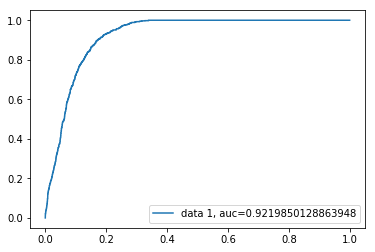

In [192]:
y_pred_proba = logistic_regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [193]:
y_train

,is_carbrokedown
20118,0
1225,0
6408,1
16870,1
13583,0
3333,0
4754,0
3619,0
19617,0
6110,0


In [261]:
THRESHOLD = 0.5
preds = np.where(logistic_regressor.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(accuracy_score(y_test, preds), recall_score(y_test, preds),precision_score(y_test, preds), roc_auc_score(y_test, preds))

0.9400793067998238 0.9472140762463344 0.7324263038548753 0.9430159562012868


In [ ]:
y_pred_proba = logistic_regressor.predict_proba(valid_data_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(valid_data_y,  y_pred_proba)
auc = metrics.roc_auc_score(valid_data_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [262]:
THRESHOLD = 0.5
preds = np.where(logistic_regressor.predict_proba(valid_data_x)[:,1] > THRESHOLD, 1, 0)
print(accuracy_score(valid_data_y, preds), recall_score(valid_data_y, preds),precision_score(valid_data_y, preds), roc_auc_score(valid_data_y, preds))
print(logistic_regressor.score(valid_data_x,valid_data_y))

0.35949908368967626 0.056149431754247775 1.0 0.5280747158771238
0.35949908368967626


In [ ]:
valid_data.is_carbrokedown.value_counts()

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_data_y, y_pred))

In [ ]:
clf.feature_importances_  

## Find correlation between dependent and independent variables

In [50]:
train_data.columns

Index(['vehicleId', 'days', 'ecoMode', 'cityMode', 'sportMode', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
       's20', 's21', 'car_brokedown_day', 'RUL', 'is_carbrokedown'],
      dtype='object')

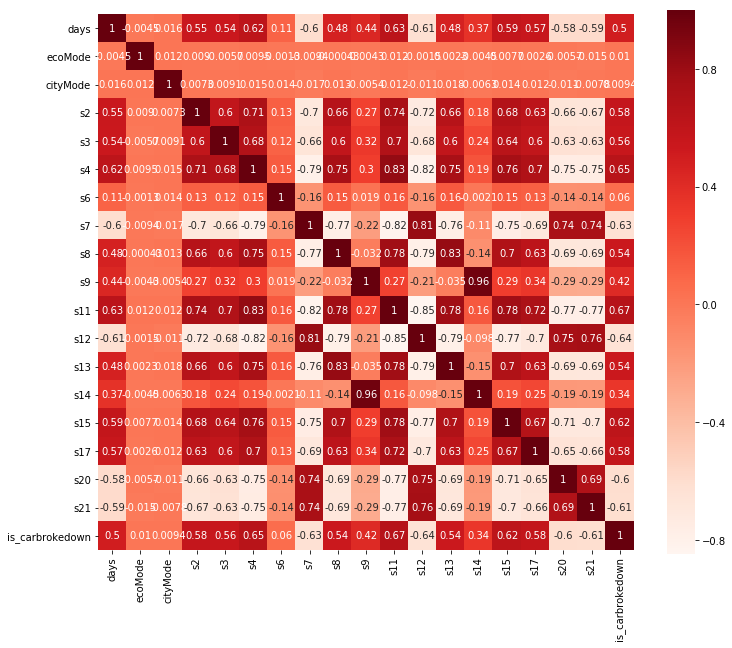

In [51]:
cols = [col for col in train_data.columns if col not in non_imp_features]
cols.extend(['is_carbrokedown'])
corrmat = train_data[cols].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, annot=True, square=True,cmap=plt.cm.Reds);
#sns.heatmap(corrmat, annot=True, )

In [ ]:
corrmat['is_carbrokedown']

In [52]:
corr_matrix = train_data[cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [53]:
to_drop

['s14']

In [ ]:
train_data[['cityMode', 'is_carbrokedown']].groupby(['cityMode'], as_index=False).mean().sort_values(by='is_carbrokedown', ascending=False)

In [ ]:
train_data[['ecoMode', 'is_carbrokedown']].groupby(['ecoMode'], as_index=False).mean().sort_values(by='is_carbrokedown', ascending=False)

In [ ]:
train_data[['s2', 'is_carbrokedown']].groupby(['s2'], as_index=False).mean().sort_values(by='is_carbrokedown', ascending=False)

In [ ]:
train_data[train_data.is_carbrokedown==True]

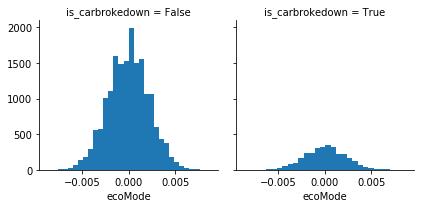

In [63]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 'ecoMode', bins=30)

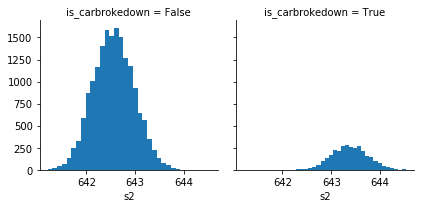

In [64]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's2', bins=30)

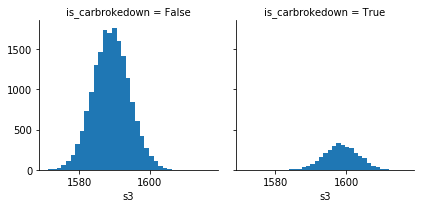

In [67]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's3', bins=30)

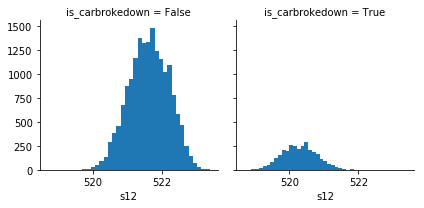

In [68]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's12', bins=30)

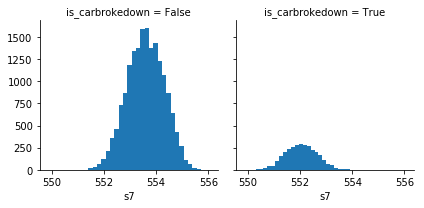

In [66]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's7', bins=30)

In [ ]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's20', bins=30)

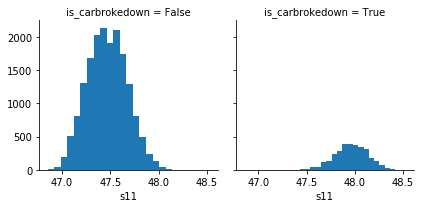

In [65]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's11', bins=20)

In [ ]:
train_data.s18.value_counts()

In [ ]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's21', bins=30)

In [ ]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 's15', bins=30)

In [ ]:
train_data[train_data.vehicleId==1].tail(5)

In [ ]:
train_data[train_data.vehicleId==2].tail(5)

In [130]:
non_imp_features

['sportMode',
 's1',
 's5',
 's10',
 's16',
 's18',
 's19',
 'a1',
 'a5',
 'a10',
 'a16',
 'a18',
 'a19']

In [ ]:
sel_train_data = train_data[]

In [343]:
#train_data1 = pd.DataFrame()
for vehicleId in train_data.vehicleId.unique():
    print(vehicleId)
    for i in range(5,26):
        print(train_data.columns[i])
        train_data.loc[train_data.vehicleId==vehicleId,"a"+str(i-4)] = train_data.loc[train_data.vehicleId==vehicleId].iloc[:,i].rolling(window=5,min_periods=1).mean()
        #train_data["std"+str(i-4)] = train_data.iloc[:,i].rolling(window=5,min_periods=1).std(ddof=0)

1
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
2
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
3
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
4
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
5
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
6
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
7
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
8
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
9
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
10
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
11
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
12
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
13
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20

In [344]:
train_data.head()

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,car_brokedown_day,RUL,is_carbrokedown,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,0,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,0,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,0,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,0,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020


In [345]:
for vehicleId in valid_data.vehicleId.unique():
    print(vehicleId)
    for i in range(5,26):
        print(valid_data.columns[i])
        valid_data.loc[valid_data.vehicleId==vehicleId,"a"+str(i-4)] = valid_data.loc[valid_data.vehicleId==vehicleId].iloc[:,i].rolling(window=5,min_periods=1).mean()
        #train_data["std"+str(i-4)] = train_data.iloc[:,i].rolling(window=5,min_periods=1).std(ddof=0)

1
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
2
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
3
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
4
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
5
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
6
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
7
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
8
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
9
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
10
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
11
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
12
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
13
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20

In [346]:
valid_data.head()

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,is_carbrokedown,is_final,is_final1,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,112,0,False,True,518.67,643.020000,1585.290000,1398.210000,14.62,21.61,553.900000,2388.040000,9050.170,1.3,47.200,521.7200,2388.0300,8125.550000,8.405200,0.03,392.000000,2388.0,100.0,38.860000,23.37350
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,111,0,False,True,518.67,642.365000,1586.870000,1396.815000,14.62,21.61,554.375000,2388.025000,9052.295,1.3,47.350,521.9400,2388.0450,8132.585000,8.392750,0.03,392.500000,2388.0,100.0,38.940000,23.38255
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,110,0,False,True,518.67,642.396667,1586.893333,1398.323333,14.62,21.61,554.286667,2388.033333,9053.850,1.3,47.400,521.9500,2388.0400,8131.756667,8.409867,0.03,392.666667,2388.0,100.0,38.986667,23.39390
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,109,0,False,True,518.67,642.407500,1586.200000,1400.347500,14.62,21.61,554.232500,2388.032500,9051.710,1.3,47.370,521.8075,2388.0425,8132.042500,8.405325,0.03,392.250000,2388.0,100.0,38.990000,23.38885
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,108,0,False,True,518.67,642.428000,1586.398000,1400.662000,14.62,21.61,554.218000,2388.028000,9050.278,1.3,47.358,521.8760,2388.0400,8131.542000,8.404880,0.03,391.800000,2388.0,100.0,38.990000,23.39368


In [355]:
sel_feat = list(set(train_data.columns) -set(['is_carbrokedown','RUL','car_brokedown_day','vehicleId']))
#sel_feat = [col for col in features if col not in non_imp_features]

In [356]:
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y, valid_data_final_x,valid_data_final_y = prepare_train_test_set(train_data, valid_data,sel_feat)
print(sel_feat)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, valid_cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)
valid_final_pred, valid_final_score, valid_final_cm = get_predictions(logistic_regressor,valid_data_final_x,valid_data_final_y)

(13096, 46) (13096,) 13822 6809 13822 6809
['s12', 'a7', 's10', 's14', 'ecoMode', 'a18', 'a19', 'days', 'a5', 's15', 's17', 's20', 'a21', 'a10', 's1', 'a12', 's8', 'a14', 'a15', 'a20', 'a2', 'a17', 's11', 's3', 'a6', 's21', 's4', 'cityMode', 'a1', 's16', 'a11', 's9', 's18', 's6', 's5', 's7', 'sportMode', 's13', 's2', 'a8', 'a9', 's19', 'a4', 'a16', 'a13', 'a3']


In [357]:
score, valid_score, valid_final_score

(0.9416948156851226, 0.3583536957849725, 0.6802973977695167)

In [351]:
non_imp_features1 = []
for i in range(len(train_data.columns)):
    print(train_data.columns[i],train_data.iloc[:,i].nunique())
    if train_data.iloc[:,i].nunique() == 1:
        non_imp_features1.append(train_data.columns[i])

vehicleId 100
days 362
ecoMode 158
cityMode 13
sportMode 1
s1 1
s2 310
s3 3012
s4 4051
s5 1
s6 2
s7 513
s8 53
s9 6403
s10 1
s11 159
s12 427
s13 56
s14 6078
s15 1918
s16 1
s17 13
s18 1
s19 1
s20 120
s21 4745
car_brokedown_day 66
RUL 362
is_carbrokedown 2
a1 1
a2 7559
a3 19117
a4 19713
a5 1
a6 30
a7 10870
a8 2289
a9 19533
a10 1
a11 8353
a12 9497
a13 2444
a14 19490
a15 16703
a16 1
a17 59
a18 1
a19 1
a20 4656
a21 19792


In [358]:
non_imp_features1

['sportMode',
 's1',
 's5',
 's10',
 's16',
 's18',
 's19',
 'a1',
 'a5',
 'a10',
 'a16',
 'a18',
 'a19']

In [359]:
sel_feat = list(set(train_data.columns) -set(['is_carbrokedown','RUL','car_brokedown_day','vehicleId']))
sel_feat = [col for col in features if col not in non_imp_features1]

In [360]:
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y, valid_data_final_x,valid_data_final_y = prepare_train_test_set(train_data, valid_data,sel_feat)
print(sel_feat)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, valid_cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)
valid_final_pred, valid_final_score, valid_final_cm = get_predictions(logistic_regressor,valid_data_final_x,valid_data_final_y)

(13096, 33) (13096,) 13822 6809 13822 6809
['s12', 'a7', 's14', 'ecoMode', 'days', 's15', 's17', 's20', 'a21', 'a12', 's8', 'a14', 'a15', 'a20', 'a2', 'a17', 's11', 's3', 'a6', 's21', 's4', 'cityMode', 'a11', 's9', 's6', 's7', 's13', 's2', 'a8', 'a9', 'a4', 'a13', 'a3']


In [354]:
score, valid_score, valid_final_score

(0.9416948156851226, 0.3583536957849725, 0.6802973977695167)

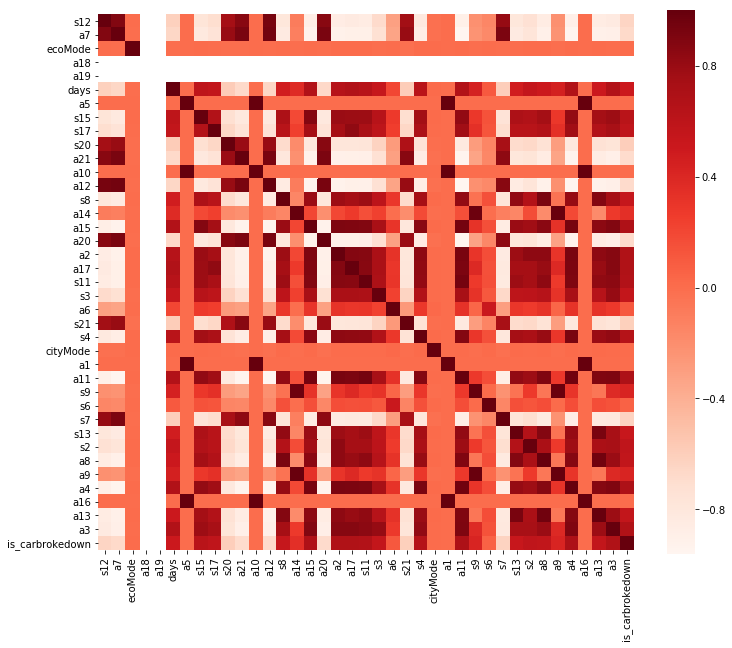

In [311]:
#cols = [col for col in train_data.columns if col not in non_imp_features]
cols = features
cols.extend(['is_carbrokedown'])
corrmat = train_data[cols].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, square=True,cmap=plt.cm.Reds);
#sns.heatmap(corrmat, annot=True, )

In [312]:
corr_matrix = train_data[cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [128]:
corr_matrix['is_carbrokedown']

a7                 0.674600
s12                0.640174
ecoMode            0.010499
days               0.503679
s15                0.618732
s17                0.583067
s20                0.599912
a21                0.687582
a20                0.681137
a15                0.693216
a12                0.677270
s8                 0.542910
a2                 0.680308
a17                0.685537
s11                0.665655
s3                 0.561892
a6                 0.115865
s21                0.606480
s4                 0.648406
cityMode           0.009402
a11                0.696717
s9                 0.419539
s6                 0.059579
s7                 0.625592
s13                0.539915
s2                 0.581404
a8                 0.573268
a9                 0.424076
a4                 0.695622
a13                0.570062
a3                 0.681233
is_carbrokedown    1.000000
Name: is_carbrokedown, dtype: float64

In [313]:
to_drop

['a21',
 'a10',
 'a12',
 'a15',
 'a20',
 'a2',
 's11',
 'a1',
 'a11',
 's9',
 's7',
 'a8',
 'a9',
 'a4',
 'a16',
 'a13',
 'a3']

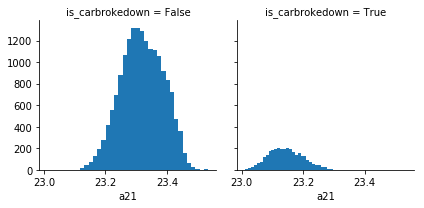

In [78]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 'a21', bins=30)

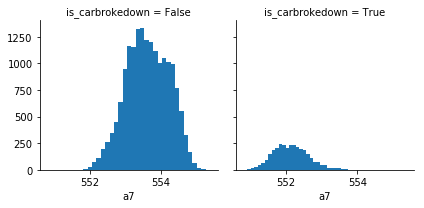

In [79]:
g = sns.FacetGrid(train_data, col='is_carbrokedown')
g.map(plt.hist, 'a7', bins=30)

In [314]:
non_imp_features.extend(to_drop)

In [86]:
features

['a7',
 's12',
 'ecoMode',
 'days',
 's15',
 's17',
 's20',
 'a21',
 'a20',
 'a15',
 'a12',
 's8',
 'a2',
 'a17',
 's11',
 's3',
 'a6',
 's21',
 's4',
 'cityMode',
 'a11',
 's9',
 's6',
 's7',
 's13',
 's2',
 'a8',
 'a9',
 'a4',
 'a13',
 'a3']

In [315]:
features = list(set(train_data.columns) -set(['is_carbrokedown','RUL','car_brokedown_day','vehicleId']) - set(non_imp_features)-set(to_drop))
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,features)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)
valid_final_pred, valid_final_score, cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)

(13096, 19) (13096,) 13822 6809 13822 6809


In [316]:
score, valid_score, valid_final_score

(0.9400793067998238, 0.3599572388515577, 0.3599572388515577)

## oversample minority class using SMOTE

In [199]:
y_train.is_carbrokedown.value_counts()

0    11745
1     2077
Name: is_carbrokedown, dtype: int64

In [319]:
print("Before OverSampling, counts of label '0':",sum(y_train_res==0))
print("Before OverSampling, counts of label '1':",sum(y_train_res==1))
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X:',X_train_res.shape)
print('After OverSampling, the shape of train_y:',y_train_res.shape)

print("After OverSampling, counts of label '1':",sum(y_train_res==1))
print("After OverSampling, counts of label '0':",sum(y_train_res==0))

Before OverSampling, counts of label '0': 2077
Before OverSampling, counts of label '1': 2077
After OverSampling, the shape of train_X: (23490, 19)
After OverSampling, the shape of train_y: (23490,)
After OverSampling, counts of label '1': 11745
After OverSampling, counts of label '0': 11745


In [332]:
non_imp_features

['sportMode',
 's1',
 's5',
 's10',
 's16',
 's18',
 's19',
 'a1',
 'a5',
 'a10',
 'a16',
 'a18',
 'a19',
 'a21',
 'a10',
 'a12',
 'a15',
 'a20',
 'a2',
 's11',
 'a1',
 'a11',
 's9',
 's7',
 'a8',
 'a9',
 'a4',
 'a16',
 'a13',
 'a3']

In [330]:
features = list(set(train_data.columns) -set(['is_carbrokedown','RUL','car_brokedown_day','vehicleId']) - set(non_imp_features)-set(to_drop))
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,features)
logistic_regressor = build_logistic_model(X_train,y_train)
predictions, score, cm = get_predictions(logistic_regressor,X_test,y_test)
valid_pred, valid_score, cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)
valid_final_pred, valid_final_score, cm = get_predictions(logistic_regressor,valid_data_x,valid_data_y)

(13096, 19) (13096,) 13822 6809 13822 6809


In [328]:
X_train.shape

(13822, 46)

In [331]:
score, valid_score,valid_final_score

(0.9400793067998238, 0.3599572388515577, 0.3599572388515577)

In [215]:
from itertools import chain, combinations
feature_combinations = sum([list(map(list, combinations(features, i))) for i in range(len(features) + 1)], [])


In [276]:
features

['s12',
 's11',
 's3',
 's21',
 's4',
 's10',
 'cityMode',
 's16',
 's14',
 'ecoMode',
 's9',
 's18',
 's6',
 's5',
 'days',
 's7',
 'sportMode',
 's15',
 's13',
 's2',
 's19',
 's17',
 's20',
 's1',
 's8']

In [293]:
from sklearn.feature_selection import RFE
clf = LogisticRegression(solver='liblinear',max_iter=3000,C=1,class_weight='balanced',penalty='l1')
selector = RFE(clf, 10, step=1)
selector = selector.fit(X_train, y_train)

In [286]:
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,features)

(13096, 25) (13096,) 13822 6809 13822 6809


In [297]:
selector.n_features_,selector.ranking_
sel_features = [features[i] for i in range(len(features)) if selector.ranking_[i]==1]


In [300]:
X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,sel_features)
clf = build_logistic_model(X_train, y_train)
_,score, _ = get_predictions(clf, X_test,y_test)
print("features:",sel_features,"score:",score, clf.score(valid_data_x,valid_data_y),clf.score(valid_data_final_x,valid_data_final_y))

(13096, 10) (13096,) 13822 6809 13822 6809
features: ['s12', 's11', 's4', 's16', 's9', 's5', 'days', 's7', 's13', 's8'] score: 0.94037303568806 0.3599572388515577 0.47


In [274]:
max_score = 0
imp_features = []
for f in features:
    for f in features:
    sel_features = [f]
    print(len(f),f)
    if len(f)==0:
        continue
    X_train, X_test, y_train, y_test, valid_data_x, valid_data_y,valid_data_final_x, valid_data_final_y = prepare_train_test_set(train_data, valid_data,f)
    clf = build_logistic_model(X_train, y_train)
    _,score, _ = get_predictions(clf, X_test,y_test)
    print("features:",f,"score:",score, clf.score(valid_data_x,valid_data_y),clf.score(valid_data_final_x,valid_data_final_y))
    if score > max_score:
        imp_features.append((f,score))
        max_score = score

0 []
1 ['s15']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s15'] score: 0.8665002202966662 0.391188149053146 0.56
1 ['s12']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s12'] score: 0.8841239535908356 0.38637751985339036 0.48
1 ['s13']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s13'] score: 0.8055514759876634 0.4085216860109957 0.52
1 ['s2']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s2'] score: 0.8468203847848436 0.39844227244960295 0.52
1 ['s3']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s3'] score: 0.8278748714936114 0.40065668906536345 0.56
1 ['s21']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s21'] score: 0.8607725069760611 0.3947006719609041 0.53
1 ['s4']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['s4'] score: 0.8888236158026142 0.38080329871716556 0.49
1 ['cityMode']
(13096, 1) (13096,) 13822 6809 13822 6809
features: ['cityMode'] score: 0.5398736965780585 0.48350641417226636 0.46
1 ['s17']
(13096, 1) (13096

(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 's14'] score: 0.8579820825378176 0.3927916921197312 0.52
2 ['s2', 'ecoMode']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode'] score: 0.8453517403436628 0.39851863164324985 0.52
2 ['s2', 's9']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 's9'] score: 0.8634160669701865 0.39111178985949907 0.51
2 ['s2', 's6']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 's6'] score: 0.8471141136730798 0.3982895540623091 0.52
2 ['s2', 's8']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 's8'] score: 0.8656190336319577 0.3889737324373855 0.5
2 ['s2', 'days']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s2', 'days'] score: 0.8710530180643267 0.3906536346976176 0.5
2 ['s3', 's21']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s3', 's21'] score: 0.8902922602437949 0.38095601710445937 0.5
2 ['s3', 's4']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s3', 's4'] score: 0

features: ['s14', 'days'] score: 0.8014392715523572 0.4323457544288332 0.63
2 ['ecoMode', 's9']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9'] score: 0.7893963871346747 0.4090562003665241 0.44
2 ['ecoMode', 's6']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's6'] score: 0.3492436481127919 0.5799480757483201 0.61
2 ['ecoMode', 's8']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's8'] score: 0.8055514759876634 0.4067654245571167 0.51
2 ['ecoMode', 'days']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 'days'] score: 0.8014392715523572 0.43463653023824067 0.63
2 ['s9', 's6']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s9', 's6'] score: 0.7838155382581877 0.412797800855223 0.44
2 ['s9', 's8']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s9', 's8'] score: 0.9086503157585548 0.37370189370800244 0.48
2 ['s9', 'days']
(13096, 2) (13096,) 13822 6809 13822 6809
features: ['s9', 'days'] score: 0.804817

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's6'] score: 0.8898516669114407 0.3800397067806964 0.5
3 ['s15', 's3', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's8'] score: 0.8939638713467469 0.3785125229077581 0.51
3 ['s15', 's3', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 'days'] score: 0.8939638713467469 0.37744349419670126 0.52
3 ['s15', 's21', 's4']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's4'] score: 0.9127625201938611 0.37018937080024433 0.5
3 ['s15', 's21', 'cityMode']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode'] score: 0.8963137024526362 0.37919975565058034 0.52
3 ['s15', 's21', 's17']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's17'] score: 0.9090909090909091 0.373167379352474 0.5
3 ['s15', 's21', 's20']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20'] score: 0.9080628579820825 0.374694563

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's6', 's8'] score: 0.875312086943751 0.3869883934025657 0.54
3 ['s15', 's6', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's6', 'days'] score: 0.8839770891467176 0.38637751985339036 0.55
3 ['s15', 's8', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s15', 's8', 'days'] score: 0.8869143780290791 0.38133781307269393 0.53
3 ['s12', 's13', 's2']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2'] score: 0.8983698046702894 0.37912339645693344 0.45
3 ['s12', 's13', 's3']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3'] score: 0.8948450580114554 0.3758399511301161 0.5
3 ['s12', 's13', 's21']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21'] score: 0.901600822440887 0.3778252901649359 0.47
3 ['s12', 's13', 's4']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4'] score: 0.9065942135409017 0.37171655467318265 

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'days'] score: 0.906887942429138 0.36988393402565667 0.51
3 ['s12', 'cityMode', 's17']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's17'] score: 0.903363195770304 0.3775198533903482 0.48
3 ['s12', 'cityMode', 's20']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's20'] score: 0.9007196357761786 0.3778252901649359 0.5
3 ['s12', 'cityMode', 's14']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14'] score: 0.9092377735350272 0.3730910201588271 0.46
3 ['s12', 'cityMode', 'ecoMode']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 'ecoMode'] score: 0.8851520046996623 0.3871411117898595 0.47
3 ['s12', 'cityMode', 's9']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's9'] score: 0.9105595535320898 0.37171655467318265 0.46
3 ['s12', 'cityMode', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: [

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's9'] score: 0.9155529446321046 0.36965485644471596 0.49
3 ['s13', 's3', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's6'] score: 0.8651784402996034 0.39088271227855836 0.49
3 ['s13', 's3', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's8'] score: 0.8692906447349097 0.3888210140500916 0.51
3 ['s13', 's3', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'days'] score: 0.8811866647084741 0.38202504581551616 0.54
3 ['s13', 's21', 's4']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's4'] score: 0.9046849757673667 0.37469456322541234 0.51
3 ['s13', 's21', 'cityMode']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode'] score: 0.873696578058452 0.39141722663408673 0.5
3 ['s13', 's21', 's17']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17'] score: 0.8983698046702894 0.377367135

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's6', 's8'] score: 0.815831987075929 0.40813989004276113 0.51
3 ['s13', 's6', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's6', 'days'] score: 0.8597444558672346 0.3953115455100794 0.53
3 ['s13', 's8', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s13', 's8', 'days'] score: 0.8645909825231312 0.39248625534514353 0.53
3 ['s2', 's3', 's21']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21'] score: 0.9013070935526509 0.37431276725717777 0.51
3 ['s2', 's3', 's4']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's4'] score: 0.9085034513144368 0.37179291386682956 0.52
3 ['s2', 's3', 'cityMode']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode'] score: 0.8779556469378763 0.3823304825901038 0.53
3 ['s2', 's3', 's17']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's17'] score: 0.8970480246732266 0.3748472816127062 

features: ['s2', 's14', 's6'] score: 0.8579820825378176 0.39294441050702505 0.52
3 ['s2', 's14', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 's8'] score: 0.9148186224115141 0.3702657299938913 0.49
3 ['s2', 's14', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 'days'] score: 0.8738434425025702 0.38737018937080026 0.52
3 ['s2', 'ecoMode', 's9']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 's9'] score: 0.8618005580848876 0.39103543066585217 0.51
3 ['s2', 'ecoMode', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 's6'] score: 0.8453517403436628 0.398365913255956 0.52
3 ['s2', 'ecoMode', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 's8'] score: 0.8650315758554854 0.3887446548564447 0.5
3 ['s2', 'ecoMode', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 'days'] score: 0.8710530180643267 0.3908063530849114 0.51
3 ['s2', 's9', 

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 's14', 's8'] score: 0.9129093846379791 0.3711820403176542 0.51
3 ['s3', 's14', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 's14', 'days'] score: 0.8645909825231312 0.39401343921808185 0.57
3 ['s3', 'ecoMode', 's9']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 'ecoMode', 's9'] score: 0.8465266558966075 0.3956169822846671 0.54
3 ['s3', 'ecoMode', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 'ecoMode', 's6'] score: 0.8277280070494933 0.40042761148442274 0.56
3 ['s3', 'ecoMode', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 'ecoMode', 's8'] score: 0.8687031869584374 0.38828649969456325 0.53
3 ['s3', 'ecoMode', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 'ecoMode', 'days'] score: 0.8647378469672492 0.3947006719609041 0.57
3 ['s3', 's9', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s3', 's9', 's6'] score: 0.84623292700837

features: ['s21', 's6', 'days'] score: 0.8811866647084741 0.3872174709835064 0.58
3 ['s21', 's8', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s21', 's8', 'days'] score: 0.8905859891320311 0.3804978619425779 0.52
3 ['s4', 'cityMode', 's17']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's17'] score: 0.9043912468791305 0.3733964569334148 0.49
3 ['s4', 'cityMode', 's20']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's20'] score: 0.9017476868850052 0.37538179596823457 0.5
3 ['s4', 'cityMode', 's14']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's14'] score: 0.901453957996769 0.373167379352474 0.49
3 ['s4', 'cityMode', 'ecoMode']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 'ecoMode'] score: 0.8898516669114407 0.38072693952351866 0.49
3 ['s4', 'cityMode', 's9']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's9'] score: 0.9029226024379498 0.3715638

(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's14', 'days'] score: 0.8020267293288295 0.431658521686011 0.62
3 ['cityMode', 'ecoMode', 's9']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 'ecoMode', 's9'] score: 0.791746218240564 0.408292608430055 0.44
3 ['cityMode', 'ecoMode', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 'ecoMode', 's6'] score: 0.3730356880599207 0.5634544899205864 0.56
3 ['cityMode', 'ecoMode', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 'ecoMode', 's8'] score: 0.8042296959906007 0.408292608430055 0.52
3 ['cityMode', 'ecoMode', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 'ecoMode', 'days'] score: 0.8018798648847114 0.43456017104459377 0.63
3 ['cityMode', 's9', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's9', 's6'] score: 0.7851373182552503 0.41249236408063533 0.44
3 ['cityMode', 's9', 's8']
(13096, 3) (13096,) 13822 6809 

features: ['s14', 's6', 'days'] score: 0.8012924071082391 0.4324984728161271 0.63
3 ['s14', 's8', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['s14', 's8', 'days'] score: 0.907181671317374 0.37461820403176543 0.47
3 ['ecoMode', 's9', 's6']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9', 's6'] score: 0.7839624027023058 0.41424862553451436 0.44
3 ['ecoMode', 's9', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9', 's8'] score: 0.908797180202673 0.3733200977397679 0.48
3 ['ecoMode', 's9', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9', 'days'] score: 0.8054046115435453 0.4286041539401344 0.61
3 ['ecoMode', 's6', 's8']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's6', 's8'] score: 0.8055514759876634 0.40691814294441053 0.51
3 ['ecoMode', 's6', 'days']
(13096, 3) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's6', 'days'] score: 0.8017330004405934 0.43501832620647524 0.63


features: ['s15', 's12', 's21', 's14'] score: 0.9261271846086062 0.365989615149664 0.48
4 ['s15', 's12', 's21', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 'ecoMode'] score: 0.9132031135262153 0.3740073304825901 0.52
4 ['s15', 's12', 's21', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's9'] score: 0.9253928623880159 0.3666768478924863 0.5
4 ['s15', 's12', 's21', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's6'] score: 0.9124687913056249 0.37377825290164934 0.52
4 ['s15', 's12', 's21', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's8'] score: 0.9130562490820973 0.3741600488698839 0.53
4 ['s15', 's12', 's21', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 'days'] score: 0.9121750624173888 0.37263286499694565 0.51
4 ['s15', 's12', 's4', 'cityMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's21'] score: 0.9083565868703187 0.37454184483811853 0.5
4 ['s15', 's13', 's2', 's4']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's4'] score: 0.9104126890879718 0.3711056811240073 0.51
4 ['s15', 's13', 's2', 'cityMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 'cityMode'] score: 0.8951387868996916 0.3785125229077581 0.49
4 ['s15', 's13', 's2', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's17'] score: 0.9073285357614922 0.37438912645082467 0.44
4 ['s15', 's13', 's2', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's20'] score: 0.9073285357614922 0.3740073304825901 0.51
4 ['s15', 's13', 's2', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14'] score: 0.9228961668380086 0.3675931582162492 0.47
4 ['s15', 's13', 's2', 'ecoMode']
(13096, 4) (13096,) 13822 6

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's9'] score: 0.9230430312821266 0.365989615149664 0.46
4 ['s15', 's13', 's17', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's6'] score: 0.8967542957849904 0.3794288332315211 0.5
4 ['s15', 's13', 's17', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's8'] score: 0.8986635335585255 0.37820708613317044 0.5
4 ['s15', 's13', 's17', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 'days'] score: 0.903216331326186 0.37637446548564446 0.5
4 ['s15', 's13', 's20', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's20', 's14'] score: 0.9227493023938904 0.36629505192425166 0.48
4 ['s15', 's13', 's20', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's20', 'ecoMode'] score: 0.8954325157879277 0.3785125229077581 0.51
4 ['s15', 's13', 's20', 's9']
(13096, 4) (13096,) 13822 

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's4', 's6'] score: 0.9090909090909091 0.3702657299938913 0.49
4 ['s15', 's2', 's4', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's4', 's8'] score: 0.9098252313114995 0.3710293219303604 0.5
4 ['s15', 's2', 's4', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's4', 'days'] score: 0.9111470113085622 0.36904398289554063 0.49
4 ['s15', 's2', 'cityMode', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's17'] score: 0.9049787046556029 0.374083689676237 0.47
4 ['s15', 's2', 'cityMode', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's20'] score: 0.9055661624320752 0.3744654856444716 0.52
4 ['s15', 's2', 'cityMode', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's14'] score: 0.8998384491114702 0.3748472816127062 0.5
4 ['s15', 's2', 'cityMode', 'ecoMode']
(13096, 4

features: ['s15', 's3', 's4', 's20'] score: 0.9127625201938611 0.36912034208918754 0.5
4 ['s15', 's3', 's4', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's14'] score: 0.9170215890732853 0.36728772144166155 0.47
4 ['s15', 's3', 's4', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 'ecoMode'] score: 0.910853282420326 0.3699602932193036 0.49
4 ['s15', 's3', 's4', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's9'] score: 0.91819650462623 0.3673640806353085 0.48
4 ['s15', 's3', 's4', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's6'] score: 0.9105595535320898 0.37003665241295053 0.49
4 ['s15', 's3', 's4', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's8'] score: 0.9104126890879718 0.37011301160659743 0.51
4 ['s15', 's3', 's4', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 'days'] score: 0.90

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's17'] score: 0.9098252313114995 0.374083689676237 0.5
4 ['s15', 's21', 'cityMode', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's20'] score: 0.9083565868703187 0.3751527183872938 0.52
4 ['s15', 's21', 'cityMode', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's14'] score: 0.9063004846526656 0.3739309712889432 0.51
4 ['s15', 's21', 'cityMode', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 'ecoMode'] score: 0.8960199735644001 0.3796579108124618 0.53
4 ['s15', 's21', 'cityMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's9'] score: 0.9065942135409017 0.373243738546121 0.51
4 ['s15', 's21', 'cityMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's6'] score: 0.8961668380085182 0.3794288332315211 0.52
4 [

features: ['s15', 's4', 's17', 'days'] score: 0.9143780290791599 0.36904398289554063 0.49
4 ['s15', 's4', 's20', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's14'] score: 0.9190776912909384 0.3664477703115455 0.49
4 ['s15', 's4', 's20', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 'ecoMode'] score: 0.9112938757526803 0.3709529627367135 0.49
4 ['s15', 's4', 's20', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's9'] score: 0.9195182846232927 0.3656078191814294 0.48
4 ['s15', 's4', 's20', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's6'] score: 0.9120281979732706 0.37072388515577276 0.49
4 ['s15', 's4', 's20', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's8'] score: 0.9104126890879718 0.37087660354306656 0.51
4 ['s15', 's4', 's20', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 'd

features: ['s15', 's17', 's20', 's14'] score: 0.9118813335291526 0.37171655467318265 0.51
4 ['s15', 's17', 's20', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 'ecoMode'] score: 0.9074754002056102 0.37576359193646913 0.51
4 ['s15', 's17', 's20', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's9'] score: 0.912615655749743 0.37072388515577276 0.5
4 ['s15', 's17', 's20', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's6'] score: 0.9083565868703187 0.3759926695174099 0.51
4 ['s15', 's17', 's20', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's8'] score: 0.9102658246438537 0.374083689676237 0.51
4 ['s15', 's17', 's20', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 'days'] score: 0.9079159935379645 0.37286194257788635 0.51
4 ['s15', 's17', 's14', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', '

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 'ecoMode', 's8', 'days'] score: 0.8872081069173153 0.3814905314599878 0.53
4 ['s15', 's9', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's9', 's6', 's8'] score: 0.9183433690703481 0.3683567501527184 0.51
4 ['s15', 's9', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's9', 's6', 'days'] score: 0.8902922602437949 0.3814141722663409 0.55
4 ['s15', 's9', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's9', 's8', 'days'] score: 0.9187839624027023 0.36797495418448384 0.51
4 ['s15', 's6', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s15', 's6', 's8', 'days'] score: 0.8867675135849611 0.38133781307269393 0.53
4 ['s12', 's13', 's2', 's3']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 's3'] score: 0.9057130268761933 0.3734728161270617 0.49
4 ['s12', 's13', 's2', 's21']
(13096, 4) (13096,) 13822 6809 13822 68

features: ['s12', 's13', 'cityMode', 's9'] score: 0.9252459979438978 0.36507330482590106 0.46
4 ['s12', 's13', 'cityMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 's6'] score: 0.8826553091496548 0.38729383017715335 0.49
4 ['s12', 's13', 'cityMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 's8'] score: 0.8835364958143633 0.38691203420891873 0.5
4 ['s12', 's13', 'cityMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 'days'] score: 0.8894110735790866 0.38011606597434333 0.51
4 ['s12', 's13', 's17', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's17', 's20'] score: 0.9123219268615068 0.3730146609651802 0.48
4 ['s12', 's13', 's17', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's17', 's14'] score: 0.9308268468203847 0.3640042761148442 0.47
4 ['s12', 's13', 's17', 'ecoMode']
(13096, 4) (13096,) 13822 6809 

features: ['s12', 's2', 's21', 's8'] score: 0.9082097224262006 0.374083689676237 0.47
4 ['s12', 's2', 's21', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 'days'] score: 0.9104126890879718 0.37080024434941966 0.49
4 ['s12', 's2', 's4', 'cityMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 'cityMode'] score: 0.9114407401967983 0.3710293219303604 0.52
4 ['s12', 's2', 's4', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's17'] score: 0.9187839624027023 0.36797495418448384 0.48
4 ['s12', 's2', 's4', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's20'] score: 0.9168747246291673 0.3694257788637752 0.51
4 ['s12', 's2', 's4', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's14'] score: 0.9278895579380232 0.36362248014660964 0.44
4 ['s12', 's2', 's4', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 'e

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's14'] score: 0.9203994712880011 0.3666768478924863 0.47
4 ['s12', 's3', 's21', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 'ecoMode'] score: 0.9080628579820825 0.3722510690287111 0.52
4 ['s12', 's3', 's21', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's9'] score: 0.9209869290644734 0.36606597434331095 0.48
4 ['s12', 's3', 's21', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's6'] score: 0.9064473490967837 0.3724037874160049 0.51
4 ['s12', 's3', 's21', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's8'] score: 0.9067410779850198 0.3722510690287111 0.52
4 ['s12', 's3', 's21', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 'days'] score: 0.906887942429138 0.3705711667684789 0.51
4 ['s12', 's3', 's4', 'cityMode']
(13096, 4) (13096,) 13822 6809 1

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 'cityMode'] score: 0.9137905713026876 0.37080024434941966 0.52
4 ['s12', 's21', 's4', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's17'] score: 0.9195182846232927 0.3673640806353085 0.47
4 ['s12', 's21', 's4', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's20'] score: 0.9196651490674108 0.3678985949908369 0.51
4 ['s12', 's21', 's4', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's14'] score: 0.9265677779409605 0.363317043372022 0.46
4 ['s12', 's21', 's4', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 'ecoMode'] score: 0.9137905713026876 0.3704184483811851 0.52
4 ['s12', 's21', 's4', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's9'] score: 0.9270083712733147 0.363317043372022 0.45
4 ['s12', 's21', 's4', 's6']
(13096, 4) (13096,) 13822 6809 

features: ['s12', 's4', 'cityMode', 's6'] score: 0.9076222646497283 0.37179291386682956 0.52
4 ['s12', 's4', 'cityMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'cityMode', 's8'] score: 0.9076222646497283 0.37179291386682956 0.52
4 ['s12', 's4', 'cityMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'cityMode', 'days'] score: 0.907034806873256 0.36988393402565667 0.5
4 ['s12', 's4', 's17', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's20'] score: 0.9206932001762373 0.36805131337813074 0.49
4 ['s12', 's4', 's17', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's14'] score: 0.9259803201644882 0.36308796579108127 0.47
4 ['s12', 's4', 's17', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 'ecoMode'] score: 0.9143780290791599 0.36927306047648134 0.49
4 ['s12', 's4', 's17', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
featu

4 ['s12', 'cityMode', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 'ecoMode', 's6'] score: 0.8851520046996623 0.3872174709835064 0.47
4 ['s12', 'cityMode', 'ecoMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 'ecoMode', 's8'] score: 0.8844176824790718 0.38630116065974346 0.5
4 ['s12', 'cityMode', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 'ecoMode', 'days'] score: 0.8902922602437949 0.38019242516799023 0.51
4 ['s12', 'cityMode', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's9', 's6'] score: 0.9104126890879718 0.37171655467318265 0.46
4 ['s12', 'cityMode', 's9', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's9', 's8'] score: 0.9278895579380232 0.36453879047037263 0.49
4 ['s12', 'cityMode', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's9', 'days'] s

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's14', 's9', 's8'] score: 0.9284770157144955 0.36469150885766644 0.48
4 ['s12', 's14', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's14', 's9', 'days'] score: 0.9110001468644441 0.37003665241295053 0.47
4 ['s12', 's14', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's14', 's6', 's8'] score: 0.9289176090468497 0.3656841783750764 0.48
4 ['s12', 's14', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's14', 's6', 'days'] score: 0.9102658246438537 0.3711056811240073 0.46
4 ['s12', 's14', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 's14', 's8', 'days'] score: 0.9273021001615509 0.36514966401954796 0.48
4 ['s12', 'ecoMode', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s12', 'ecoMode', 's9', 's6'] score: 0.910706417976208 0.3720219914477703 0.46
4 ['s12', 'ecoMode', 's9', 's8']
(13096, 4) (13096,) 13822 

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's8'] score: 0.8684094580702012 0.3879810629199756 0.48
4 ['s13', 's2', 'cityMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 'days'] score: 0.8867675135849611 0.384010384850336 0.53
4 ['s13', 's2', 's17', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's17', 's20'] score: 0.9039506535467763 0.37522907758094076 0.49
4 ['s13', 's2', 's17', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's17', 's14'] score: 0.9227493023938904 0.3678985949908369 0.45
4 ['s13', 's2', 's17', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's17', 'ecoMode'] score: 0.8938170069026289 0.3814905314599878 0.46
4 ['s13', 's2', 's17', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's17', 's9'] score: 0.9223087090615362 0.3665241295051924 0.45
4 ['s13', 's2', 's17', 's6']
(13096, 4) (13096,)

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 's14'] score: 0.910853282420326 0.37164019547953575 0.5
4 ['s13', 's3', 'cityMode', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 'ecoMode'] score: 0.8641503891907769 0.3905772755039707 0.49
4 ['s13', 's3', 'cityMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 's9'] score: 0.914524893523278 0.36919670128283444 0.49
4 ['s13', 's3', 'cityMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 's6'] score: 0.864297253634895 0.391188149053146 0.5
4 ['s13', 's3', 'cityMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 's8'] score: 0.8697312380672639 0.3881337813072694 0.51
4 ['s13', 's3', 'cityMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 'cityMode', 'days'] score: 0.8819209869290645 0.38194868662186926 0.54
4 ['s13', 's3'

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 'days'] score: 0.8877955646937876 0.38187232742822236 0.5
4 ['s13', 's21', 's17', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17', 's20'] score: 0.9055661624320752 0.3744654856444716 0.5
4 ['s13', 's21', 's17', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17', 's14'] score: 0.9212806579527096 0.3669822846670739 0.46
4 ['s13', 's21', 's17', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17', 'ecoMode'] score: 0.8979292113379351 0.3777489309712889 0.46
4 ['s13', 's21', 's17', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17', 's9'] score: 0.9221618446174181 0.36629505192425166 0.47
4 ['s13', 's21', 's17', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's17', 's6'] score: 0.8983698046702894 0.3775198533903482 0.47
4 ['s13', 's21', 's17', 's8']
(13096, 4) (13096,)

features: ['s13', 's4', 's14', 'ecoMode'] score: 0.9206932001762373 0.36614233353695785 0.47
4 ['s13', 's4', 's14', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 's9'] score: 0.9236304890585989 0.3637751985339035 0.46
4 ['s13', 's4', 's14', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 's6'] score: 0.9208400646203554 0.3658368967623702 0.47
4 ['s13', 's4', 's14', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 's8'] score: 0.9290644734909679 0.3639279169211973 0.49
4 ['s13', 's4', 's14', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 'days'] score: 0.9198120135115289 0.3654551007941356 0.47
4 ['s13', 's4', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'ecoMode', 's9'] score: 0.9227493023938904 0.3640042761148442 0.46
4 ['s13', 's4', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'ecoMo

features: ['s13', 's17', 's14', 'ecoMode'] score: 0.9137905713026876 0.370494807574832 0.46
4 ['s13', 's17', 's14', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 's9'] score: 0.9174621824056396 0.369578497251069 0.46
4 ['s13', 's17', 's14', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 's6'] score: 0.9142311646350418 0.37072388515577276 0.46
4 ['s13', 's17', 's14', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 's8'] score: 0.9262740490527244 0.3655314599877825 0.48
4 ['s13', 's17', 's14', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 'days'] score: 0.9151123512997503 0.3694257788637752 0.46
4 ['s13', 's17', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 'ecoMode', 's9'] score: 0.9165809957409311 0.36980757483200977 0.47
4 ['s13', 's17', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s13', '

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 'cityMode'] score: 0.901600822440887 0.3741600488698839 0.51
4 ['s2', 's3', 's21', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's17'] score: 0.908944044646791 0.3693494196701283 0.47
4 ['s2', 's3', 's21', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's20'] score: 0.9114407401967983 0.3711820403176542 0.5
4 ['s2', 's3', 's21', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's14'] score: 0.9079159935379645 0.3721747098350641 0.52
4 ['s2', 's3', 's21', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 'ecoMode'] score: 0.9021882802173594 0.3744654856444716 0.51
4 ['s2', 's3', 's21', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's9'] score: 0.9079159935379645 0.3710293219303604 0.51
4 ['s2', 's3', 's21', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
fea

features: ['s2', 's3', 's6', 'days'] score: 0.8907328535761492 0.3786652412950519 0.54
4 ['s2', 's3', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's8', 'days'] score: 0.8966074313408724 0.3751527183872938 0.52
4 ['s2', 's21', 's4', 'cityMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 'cityMode'] score: 0.9101189601997356 0.37255650580329874 0.51
4 ['s2', 's21', 's4', 's17']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's17'] score: 0.9146717579673961 0.3674404398289554 0.49
4 ['s2', 's21', 's4', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's20'] score: 0.9115876046409165 0.3693494196701283 0.5
4 ['s2', 's21', 's4', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's14'] score: 0.9154060801879865 0.3666768478924863 0.48
4 ['s2', 's21', 's4', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 'ecoMode

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 'cityMode', 's9'] score: 0.9098252313114995 0.36980757483200977 0.49
4 ['s2', 's4', 'cityMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 'cityMode', 's6'] score: 0.9027757379938317 0.3766799022602321 0.52
4 ['s2', 's4', 'cityMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 'cityMode', 's8'] score: 0.903363195770304 0.3766035430665852 0.53
4 ['s2', 's4', 'cityMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 'cityMode', 'days'] score: 0.9026288735497137 0.3730910201588271 0.53
4 ['s2', 's4', 's17', 's20']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 's20'] score: 0.9136437068585695 0.36896762370189373 0.49
4 ['s2', 's4', 's17', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 's14'] score: 0.9130562490820973 0.3666004886988393 0.47
4 ['s2', 's4', 's17', 'ecoMode']
(13096, 4) (130

features: ['s2', 'cityMode', 'ecoMode', 's9'] score: 0.8610662358642972 0.3915699450213806 0.51
4 ['s2', 'cityMode', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'cityMode', 'ecoMode', 's6'] score: 0.845645469231899 0.39798411728772143 0.52
4 ['s2', 'cityMode', 'ecoMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'cityMode', 'ecoMode', 's8'] score: 0.86620649140843 0.38851557727550395 0.51
4 ['s2', 'cityMode', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'cityMode', 'ecoMode', 'days'] score: 0.8714936113966809 0.39050091631032374 0.51
4 ['s2', 'cityMode', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'cityMode', 's9', 's6'] score: 0.8632692025260684 0.39126450824679293 0.5
4 ['s2', 'cityMode', 's9', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'cityMode', 's9', 's8'] score: 0.9165809957409311 0.3695021380574221 0.49
4 ['s2', 'cityMode', 's9', 'days']
(1309

features: ['s2', 's14', 's9', 's8'] score: 0.9158466735203408 0.369578497251069 0.47
4 ['s2', 's14', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 's9', 'days'] score: 0.875312086943751 0.38477397678680514 0.52
4 ['s2', 's14', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 's6', 's8'] score: 0.9146717579673961 0.3703420891875382 0.49
4 ['s2', 's14', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 's6', 'days'] score: 0.873696578058452 0.3878283445326817 0.52
4 ['s2', 's14', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 's14', 's8', 'days'] score: 0.9149654868556323 0.3702657299938913 0.49
4 ['s2', 'ecoMode', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 's9', 's6'] score: 0.8615068291966514 0.39126450824679293 0.51
4 ['s2', 'ecoMode', 's9', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s2', 'ecoMode', 's9', 's8'] s

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 'ecoMode', 's8'] score: 0.8973417535614627 0.3769853390348198 0.51
4 ['s3', 's21', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 'ecoMode', 'days'] score: 0.8957262446761639 0.3775962125839951 0.53
4 ['s3', 's21', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 's9', 's6'] score: 0.8969011602291085 0.3779016493585828 0.52
4 ['s3', 's21', 's9', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 's9', 's8'] score: 0.9212806579527096 0.3676695174098962 0.49
4 ['s3', 's21', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 's9', 'days'] score: 0.8998384491114702 0.37629810629199756 0.54
4 ['s3', 's21', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's21', 's6', 's8'] score: 0.8961668380085182 0.376832620647526 0.5
4 ['s3', 's21', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 680

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 's14'] score: 0.8883830224702599 0.37996334758704947 0.53
4 ['s3', 'cityMode', 's20', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 'ecoMode'] score: 0.8801586135996475 0.38385766646304215 0.52
4 ['s3', 'cityMode', 's20', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 's9'] score: 0.8908797180202673 0.3788943188759927 0.54
4 ['s3', 'cityMode', 's20', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 's6'] score: 0.8789836980467028 0.3843158216249236 0.52
4 ['s3', 'cityMode', 's20', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 's8'] score: 0.8889704802467323 0.38011606597434333 0.55
4 ['s3', 'cityMode', 's20', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 'cityMode', 's20', 'days'] score: 0.8916140402408577 0.380421502748931 0.55
4 ['s3', 

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 'ecoMode', 'days'] score: 0.8905859891320311 0.380421502748931 0.56
4 ['s3', 's20', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 's9', 's6'] score: 0.8910265824643854 0.37912339645693344 0.54
4 ['s3', 's20', 's9', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 's9', 's8'] score: 0.9206932001762373 0.3678985949908369 0.49
4 ['s3', 's20', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 's9', 'days'] score: 0.8955793802320459 0.3780543677458766 0.53
4 ['s3', 's20', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 's6', 's8'] score: 0.8889704802467323 0.37996334758704947 0.55
4 ['s3', 's20', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s3', 's20', 's6', 'days'] score: 0.8913203113526216 0.38011606597434333 0.55
4 ['s3', 's20', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
fea

4 ['s21', 's4', 's14', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 's14', 's8'] score: 0.9246585401674254 0.3653787416004887 0.48
4 ['s21', 's4', 's14', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 's14', 'days'] score: 0.9134968424144515 0.36896762370189373 0.51
4 ['s21', 's4', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 'ecoMode', 's9'] score: 0.912615655749743 0.3683567501527184 0.51
4 ['s21', 's4', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 'ecoMode', 's6'] score: 0.9027757379938317 0.37530543677458766 0.51
4 ['s21', 's4', 'ecoMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 'ecoMode', 's8'] score: 0.9058598913203113 0.37522907758094076 0.5
4 ['s21', 's4', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's4', 'ecoMode', 'days'] score: 0.9079159935379645 0.3709529627367135 0.5
4 ['s21', 's

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 's14', 's8'] score: 0.9220149801733001 0.36728772144166155 0.49
4 ['s21', 's17', 's14', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 's14', 'days'] score: 0.8983698046702894 0.3759926695174099 0.49
4 ['s21', 's17', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 'ecoMode', 's9'] score: 0.8998384491114702 0.37461820403176543 0.47
4 ['s21', 's17', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 'ecoMode', 's6'] score: 0.8901453957996769 0.37835980452046425 0.49
4 ['s21', 's17', 'ecoMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 'ecoMode', 's8'] score: 0.8983698046702894 0.37729077580940745 0.49
4 ['s21', 's17', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s21', 's17', 'ecoMode', 'days'] score: 0.8964605668967542 0.37637446548564446 0.47
4 ['s21', 's17', 's9', 's

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's17', 's9'] score: 0.9096783668673815 0.3693494196701283 0.5
4 ['s4', 'cityMode', 's17', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's17', 's6'] score: 0.9042443824350125 0.3733964569334148 0.49
4 ['s4', 'cityMode', 's17', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's17', 's8'] score: 0.9045381113232487 0.373167379352474 0.51
4 ['s4', 'cityMode', 's17', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's17', 'days'] score: 0.9054192979879571 0.37255650580329874 0.5
4 ['s4', 'cityMode', 's20', 's14']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's20', 's14'] score: 0.9098252313114995 0.3699602932193036 0.52
4 ['s4', 'cityMode', 's20', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 'cityMode', 's20', 'ecoMode'] score: 0.9008665002202967 0.37522907758094076 0.51
4 ['s4', 'c

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 's14', 'days'] score: 0.9099720957556175 0.3693494196701283 0.52
4 ['s4', 's20', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 'ecoMode', 's9'] score: 0.9099720957556175 0.3688149053145999 0.51
4 ['s4', 's20', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 'ecoMode', 's6'] score: 0.9010133646644147 0.37530543677458766 0.51
4 ['s4', 's20', 'ecoMode', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 'ecoMode', 's8'] score: 0.9017476868850052 0.37545815516188147 0.51
4 ['s4', 's20', 'ecoMode', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 'ecoMode', 'days'] score: 0.903363195770304 0.3722510690287111 0.53
4 ['s4', 's20', 's9', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s4', 's20', 's9', 's6'] score: 0.9099720957556175 0.36873854612095297 0.51
4 ['s4', 's20', 's9', 's8']
(13096, 4) (130

features: ['cityMode', 's17', 's6', 's8'] score: 0.8739903069466882 0.38660659743433107 0.5
4 ['cityMode', 's17', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's17', 's6', 'days'] score: 0.869878102511382 0.3927916921197312 0.53
4 ['cityMode', 's17', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's17', 's8', 'days'] score: 0.8876487002496696 0.3824832009773977 0.5
4 ['cityMode', 's20', 's14', 'ecoMode']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's20', 's14', 'ecoMode'] score: 0.8654721691878396 0.3879810629199756 0.55
4 ['cityMode', 's20', 's14', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's20', 's14', 's9'] score: 0.8757526802761052 0.38660659743433107 0.53
4 ['cityMode', 's20', 's14', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['cityMode', 's20', 's14', 's6'] score: 0.8645909825231312 0.3869883934025657 0.55
4 ['cityMode', 's20', 's14', 's8']
(13096, 4)

features: ['s17', 's20', 's9', 's8'] score: 0.9217212512850639 0.36820403176542454 0.49
4 ['s17', 's20', 's9', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's20', 's9', 'days'] score: 0.8999853135555882 0.376832620647526 0.54
4 ['s17', 's20', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's20', 's6', 's8'] score: 0.8960199735644001 0.38095601710445937 0.52
4 ['s17', 's20', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's20', 's6', 'days'] score: 0.8942576002349831 0.3790470372632865 0.52
4 ['s17', 's20', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's20', 's8', 'days'] score: 0.8982229402261712 0.375916310323763 0.51
4 ['s17', 's14', 'ecoMode', 's9']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's14', 'ecoMode', 's9'] score: 0.8651784402996034 0.3890500916310324 0.51
4 ['s17', 's14', 'ecoMode', 's6']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s17', 's14', 

(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s14', 's9', 's6', 's8'] score: 0.907034806873256 0.37362553451435554 0.48
4 ['s14', 's9', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s14', 's9', 's6', 'days'] score: 0.8224408870612425 0.4211209529627367 0.55
4 ['s14', 's9', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s14', 's9', 's8', 'days'] score: 0.9073285357614922 0.37286194257788635 0.47
4 ['s14', 's6', 's8', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['s14', 's6', 's8', 'days'] score: 0.907181671317374 0.37469456322541234 0.47
4 ['ecoMode', 's9', 's6', 's8']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9', 's6', 's8'] score: 0.908797180202673 0.3733200977397679 0.48
4 ['ecoMode', 's9', 's6', 'days']
(13096, 4) (13096,) 13822 6809 13822 6809
features: ['ecoMode', 's9', 's6', 'days'] score: 0.8051108826553092 0.4285277947464875 0.61
4 ['ecoMode', 's9', 's8', 'days']
(13096, 4) (13096,) 13822 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 's4', 's6'] score: 0.9137905713026876 0.36927306047648134 0.48
5 ['s15', 's12', 's13', 's4', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 's4', 's8'] score: 0.9142311646350418 0.36919670128283444 0.48
5 ['s15', 's12', 's13', 's4', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 's4', 'days'] score: 0.9140843001909238 0.3685094685400122 0.5
5 ['s15', 's12', 's13', 'cityMode', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 'cityMode', 's17'] score: 0.9114407401967983 0.37461820403176543 0.47
5 ['s15', 's12', 's13', 'cityMode', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 'cityMode', 's20'] score: 0.910853282420326 0.3729383017715333 0.52
5 ['s15', 's12', 's13', 'cityMode', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's13', 'cityMode', 's14'] score: 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's3', 's6'] score: 0.9133499779703333 0.370494807574832 0.5
5 ['s15', 's12', 's2', 's3', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's3', 's8'] score: 0.9133499779703333 0.370494807574832 0.5
5 ['s15', 's12', 's2', 's3', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's3', 'days'] score: 0.9139374357468057 0.3688912645082468 0.5
5 ['s15', 's12', 's2', 's21', 's4']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's21', 's4'] score: 0.9198120135115289 0.36629505192425166 0.49
5 ['s15', 's12', 's2', 's21', 'cityMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's21', 'cityMode'] score: 0.9149654868556323 0.371411117898595 0.5
5 ['s15', 's12', 's2', 's21', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's21', 's17'] score: 0.9189308268468204 0.36820403176542454 0

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's14', 'days'] score: 0.9231898957262447 0.3663714111178986 0.48
5 ['s15', 's12', 's2', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 'ecoMode', 's9'] score: 0.9239242179468351 0.36629505192425166 0.49
5 ['s15', 's12', 's2', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 'ecoMode', 's6'] score: 0.9073285357614922 0.37263286499694565 0.51
5 ['s15', 's12', 's2', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 'ecoMode', 's8'] score: 0.906887942429138 0.3724037874160049 0.5
5 ['s15', 's12', 's2', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 'ecoMode', 'days'] score: 0.910706417976208 0.3721747098350641 0.5
5 ['s15', 's12', 's2', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's2', 's9', 's6'] score: 0.92333676017

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's20', 's6'] score: 0.9101189601997356 0.3714874770922419 0.52
5 ['s15', 's12', 's3', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's20', 's8'] score: 0.9101189601997356 0.371411117898595 0.52
5 ['s15', 's12', 's3', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's20', 'days'] score: 0.9124687913056249 0.3709529627367135 0.52
5 ['s15', 's12', 's3', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's14', 'ecoMode'] score: 0.9205463357321193 0.36606597434331095 0.48
5 ['s15', 's12', 's3', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's14', 's9'] score: 0.9217212512850639 0.3664477703115455 0.48
5 ['s15', 's12', 's3', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's3', 's14', 's6'] score: 0.9203994712880011 0.365836896762

features: ['s15', 's12', 's21', 's20', 'days'] score: 0.916287266852695 0.3702657299938913 0.52
5 ['s15', 's12', 's21', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's14', 'ecoMode'] score: 0.9262740490527244 0.36629505192425166 0.48
5 ['s15', 's12', 's21', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's14', 's9'] score: 0.9253928623880159 0.3666004886988393 0.51
5 ['s15', 's12', 's21', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's14', 's6'] score: 0.9261271846086062 0.365989615149664 0.48
5 ['s15', 's12', 's21', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's14', 's8'] score: 0.9334704068145102 0.36346976175931583 0.49
5 ['s15', 's12', 's21', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's21', 's14', 'days'] score: 0.9265677779409605 0.36606597434331095 0.49
5 ['s15', 's12', '

features: ['s15', 's12', 's4', 's9', 's8'] score: 0.9322954912615655 0.3620952962736714 0.47
5 ['s15', 's12', 's4', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's4', 's9', 'days'] score: 0.9296519312674402 0.36308796579108127 0.45
5 ['s15', 's12', 's4', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's4', 's6', 's8'] score: 0.9140843001909238 0.3695021380574221 0.48
5 ['s15', 's12', 's4', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's4', 's6', 'days'] score: 0.9136437068585695 0.3684331093463653 0.5
5 ['s15', 's12', 's4', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's4', 's8', 'days'] score: 0.9137905713026876 0.3684331093463653 0.5
5 ['s15', 's12', 'cityMode', 's17', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 'cityMode', 's17', 's20'] score: 0.9196651490674108 0.37018937080024433 0.48
5 ['s15', 's12', 'cityMode', 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 'ecoMode', 's8'] score: 0.9123219268615068 0.3739309712889432 0.47
5 ['s15', 's12', 's17', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 'ecoMode', 'days'] score: 0.9134968424144515 0.37080024434941966 0.49
5 ['s15', 's12', 's17', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 's9', 's6'] score: 0.9234836246144809 0.3664477703115455 0.48
5 ['s15', 's12', 's17', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 's9', 's8'] score: 0.9321486268174475 0.3643860720830788 0.5
5 ['s15', 's12', 's17', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 's9', 'days'] score: 0.9239242179468351 0.36621869273060476 0.48
5 ['s15', 's12', 's17', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's12', 's17', 's6', 's8'] score: 0.9118813335291526 0.37

features: ['s15', 's13', 's2', 's3', 's20'] score: 0.9121750624173888 0.37164019547953575 0.52
5 ['s15', 's13', 's2', 's3', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's3', 's14'] score: 0.9252459979438978 0.3656078191814294 0.48
5 ['s15', 's13', 's2', 's3', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's3', 'ecoMode'] score: 0.9054192979879571 0.3750763591936469 0.52
5 ['s15', 's13', 's2', 's3', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's3', 's9'] score: 0.9259803201644882 0.36514966401954796 0.48
5 ['s15', 's13', 's2', 's3', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's3', 's6'] score: 0.9054192979879571 0.375 0.52
5 ['s15', 's13', 's2', 's3', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's3', 's8'] score: 0.905125569099721 0.37477092241905924 0.53
5 ['s15', 's13', 's2', 's3', 'days']
(13096, 5) (13096,

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14', 'ecoMode'] score: 0.9231898957262447 0.3678985949908369 0.48
5 ['s15', 's13', 's2', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14', 's9'] score: 0.9249522690556616 0.3667532070861332 0.47
5 ['s15', 's13', 's2', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14', 's6'] score: 0.9228961668380086 0.3675931582162492 0.47
5 ['s15', 's13', 's2', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14', 's8'] score: 0.9336172712586283 0.36408063530849116 0.5
5 ['s15', 's13', 's2', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 's14', 'days'] score: 0.923777353502717 0.3675931582162492 0.47
5 ['s15', 's13', 's2', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's2', 'ecoMode', 's9'] score: 0.9246585401674254 0.3662950519

features: ['s15', 's13', 's3', 's17', 's8'] score: 0.9073285357614922 0.37454184483811853 0.52
5 ['s15', 's13', 's3', 's17', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's3', 's17', 'days'] score: 0.9086503157585548 0.37286194257788635 0.51
5 ['s15', 's13', 's3', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's3', 's20', 's14'] score: 0.9220149801733001 0.36614233353695785 0.49
5 ['s15', 's13', 's3', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's3', 's20', 'ecoMode'] score: 0.9038037891026582 0.3758399511301161 0.52
5 ['s15', 's13', 's3', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's3', 's20', 's9'] score: 0.9233367601703627 0.3657605375687233 0.49
5 ['s15', 's13', 's3', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's3', 's20', 's6'] score: 0.9036569246585402 0.37530543677458766 0.52
5 ['s15', 's13', 's3', 's2

features: ['s15', 's13', 's21', 's20', 's14'] score: 0.9267146423850786 0.36507330482590106 0.49
5 ['s15', 's13', 's21', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's21', 's20', 'ecoMode'] score: 0.908797180202673 0.374083689676237 0.52
5 ['s15', 's13', 's21', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's21', 's20', 's9'] score: 0.927448964605669 0.3647678680513134 0.48
5 ['s15', 's13', 's21', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's21', 's20', 's6'] score: 0.9080628579820825 0.3741600488698839 0.52
5 ['s15', 's13', 's21', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's21', 's20', 's8'] score: 0.9093846379791453 0.37423640806353087 0.51
5 ['s15', 's13', 's21', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's21', 's20', 'days'] score: 0.9118813335291526 0.3729383017715333 0.51
5 ['s15', 's13', 's21

features: ['s15', 's13', 's4', 'ecoMode', 's9'] score: 0.9275958290497871 0.36270616982284665 0.47
5 ['s15', 's13', 's4', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's4', 'ecoMode', 's6'] score: 0.9067410779850198 0.37362553451435554 0.51
5 ['s15', 's13', 's4', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's4', 'ecoMode', 's8'] score: 0.9074754002056102 0.37370189370800244 0.51
5 ['s15', 's13', 's4', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's4', 'ecoMode', 'days'] score: 0.9077691290938463 0.3712583995113012 0.52
5 ['s15', 's13', 's4', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's4', 's9', 's6'] score: 0.9275958290497871 0.36262981062919974 0.49
5 ['s15', 's13', 's4', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's4', 's9', 's8'] score: 0.9320017623733294 0.3623243738546121 0.48
5 ['s15', 's13

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's14', 's6'] score: 0.9212806579527096 0.36713500305436775 0.47
5 ['s15', 's13', 's17', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's14', 's8'] score: 0.9308268468203847 0.36362248014660964 0.48
5 ['s15', 's13', 's17', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 's14', 'days'] score: 0.9212806579527096 0.3666768478924863 0.48
5 ['s15', 's13', 's17', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 'ecoMode', 's9'] score: 0.923777353502717 0.3663714111178986 0.47
5 ['s15', 's13', 's17', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 'ecoMode', 's6'] score: 0.8976354824496989 0.3788179596823458 0.51
5 ['s15', 's13', 's17', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's17', 'ecoMode', 's8'] score: 0.89939

features: ['s15', 's13', 's9', 's8', 'days'] score: 0.9289176090468497 0.3638515577275504 0.5
5 ['s15', 's13', 's6', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's13', 's6', 's8', 'days'] score: 0.8920546335732119 0.3806505803298717 0.53
5 ['s15', 's2', 's3', 's21', 's4']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's21', 's4'] score: 0.9179027757379938 0.36721136224801465 0.5
5 ['s15', 's2', 's3', 's21', 'cityMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's21', 'cityMode'] score: 0.9086503157585548 0.3703420891875382 0.49
5 ['s15', 's2', 's3', 's21', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's21', 's17'] score: 0.9152592157438684 0.3675167990226023 0.48
5 ['s15', 's2', 's3', 's21', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's21', 's20'] score: 0.9142311646350418 0.3694257788637752 0.5
5 ['s15', 's2', 's3', 's21', 's14']
(

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 'ecoMode', 's6'] score: 0.9026288735497137 0.3758399511301161 0.53
5 ['s15', 's2', 's3', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 'ecoMode', 's8'] score: 0.9061536202085475 0.3733964569334148 0.53
5 ['s15', 's2', 's3', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 'ecoMode', 'days'] score: 0.9048318402114848 0.3722510690287111 0.53
5 ['s15', 's2', 's3', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's9', 's6'] score: 0.9079159935379645 0.3709529627367135 0.53
5 ['s15', 's2', 's3', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's9', 's8'] score: 0.9255397268321339 0.3656841783750764 0.52
5 ['s15', 's2', 's3', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's3', 's9', 'days'] score: 0.9112938757526803 0.370494807574832

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's9', 's6'] score: 0.9142311646350418 0.37003665241295053 0.51
5 ['s15', 's2', 's21', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's9', 's8'] score: 0.9277426934939051 0.3654551007941356 0.51
5 ['s15', 's2', 's21', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's9', 'days'] score: 0.9130562490820973 0.37018937080024433 0.51
5 ['s15', 's2', 's21', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's6', 's8'] score: 0.908797180202673 0.37362553451435554 0.52
5 ['s15', 's2', 's21', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's6', 'days'] score: 0.9083565868703187 0.3730146609651802 0.51
5 ['s15', 's2', 's21', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's21', 's8', 'days'] score: 0.9098252313114995 0.37286194257788635 0.52


(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's17', 'days'] score: 0.9064473490967837 0.37270922419059255 0.48
5 ['s15', 's2', 'cityMode', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's20', 's14'] score: 0.9129093846379791 0.3712583995113012 0.51
5 ['s15', 's2', 'cityMode', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's20', 'ecoMode'] score: 0.9054192979879571 0.37461820403176543 0.51
5 ['s15', 's2', 'cityMode', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's20', 's9'] score: 0.9140843001909238 0.3705711667684789 0.52
5 ['s15', 's2', 'cityMode', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMode', 's20', 's6'] score: 0.9055661624320752 0.3744654856444716 0.52
5 ['s15', 's2', 'cityMode', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 'cityMod

features: ['s15', 's2', 's20', 's14', 's8'] score: 0.9261271846086062 0.3658368967623702 0.52
5 ['s15', 's2', 's20', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's20', 's14', 'days'] score: 0.912615655749743 0.36988393402565667 0.51
5 ['s15', 's2', 's20', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's20', 'ecoMode', 's9'] score: 0.9133499779703333 0.37018937080024433 0.51
5 ['s15', 's2', 's20', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's20', 'ecoMode', 's6'] score: 0.9049787046556029 0.37461820403176543 0.51
5 ['s15', 's2', 's20', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's20', 'ecoMode', 's8'] score: 0.905272433543839 0.3740073304825901 0.51
5 ['s15', 's2', 's20', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's2', 's20', 'ecoMode', 'days'] score: 0.905125569099721 0.373243738546121 0.51
5 ['s15

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 'cityMode', 's8'] score: 0.9061536202085475 0.37385461209529625 0.52
5 ['s15', 's3', 's21', 'cityMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 'cityMode', 'days'] score: 0.9061536202085475 0.3730146609651802 0.52
5 ['s15', 's3', 's21', 's17', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 's17', 's20'] score: 0.9177559112938758 0.3685858277336591 0.49
5 ['s15', 's3', 's21', 's17', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 's17', 's14'] score: 0.9156998090762226 0.3685858277336591 0.48
5 ['s15', 's3', 's21', 's17', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 's17', 'ecoMode'] score: 0.912615655749743 0.36896762370189373 0.49
5 ['s15', 's3', 's21', 's17', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's21', 's17', 's9'] score: 0.91702158907

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's20', 's9'] score: 0.9199588779556469 0.3654551007941356 0.5
5 ['s15', 's3', 's4', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's20', 's6'] score: 0.9127625201938611 0.36912034208918754 0.5
5 ['s15', 's3', 's4', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's20', 's8'] score: 0.9127625201938611 0.3693494196701283 0.51
5 ['s15', 's3', 's4', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's20', 'days'] score: 0.9130562490820973 0.36797495418448384 0.5
5 ['s15', 's3', 's4', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's14', 'ecoMode'] score: 0.9170215890732853 0.3669822846670739 0.47
5 ['s15', 's3', 's4', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's4', 's14', 's9'] score: 0.9176090468497576 0.3674404398289554 0.48
5 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 's14'] score: 0.9133499779703333 0.36873854612095297 0.49
5 ['s15', 's3', 's17', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 'ecoMode'] score: 0.9105595535320898 0.3713347587049481 0.5
5 ['s15', 's3', 's17', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 's9'] score: 0.9127625201938611 0.3684331093463653 0.49
5 ['s15', 's3', 's17', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 's6'] score: 0.9090909090909091 0.3711820403176542 0.5
5 ['s15', 's3', 's17', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 's8'] score: 0.9130562490820973 0.3711056811240073 0.5
5 ['s15', 's3', 's17', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's17', 's20', 'days'] score: 0.9117344690850345 0.3710293219303

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 'ecoMode', 's9', 'days'] score: 0.8986635335585255 0.37576359193646913 0.51
5 ['s15', 's3', 'ecoMode', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 'ecoMode', 's6', 's8'] score: 0.8942576002349831 0.3786652412950519 0.51
5 ['s15', 's3', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 'ecoMode', 's6', 'days'] score: 0.8941107357908651 0.377672571777642 0.52
5 ['s15', 's3', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 'ecoMode', 's8', 'days'] score: 0.8986635335585255 0.3765271838729383 0.53
5 ['s15', 's3', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's9', 's6', 's8'] score: 0.9209869290644734 0.366905925473427 0.51
5 ['s15', 's3', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's3', 's9', 's6', 'days'] score: 0.899691584667352 0.3

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's17', 's9'] score: 0.9146717579673961 0.37003665241295053 0.49
5 ['s15', 's21', 'cityMode', 's17', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's17', 's6'] score: 0.9098252313114995 0.374083689676237 0.5
5 ['s15', 's21', 'cityMode', 's17', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's17', 's8'] score: 0.9110001468644441 0.3720983506414172 0.5
5 ['s15', 's21', 'cityMode', 's17', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's17', 'days'] score: 0.908944044646791 0.37164019547953575 0.51
5 ['s15', 's21', 'cityMode', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'cityMode', 's20', 's14'] score: 0.9170215890732853 0.37011301160659743 0.51
5 ['s15', 's21', 'cityMode', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 'ci

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 's14', 'ecoMode'] score: 0.9164341312968131 0.3704184483811851 0.51
5 ['s15', 's21', 's20', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 's14', 's9'] score: 0.9159935379644588 0.370494807574832 0.51
5 ['s15', 's21', 's20', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 's14', 's6'] score: 0.9168747246291673 0.3702657299938913 0.51
5 ['s15', 's21', 's20', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 's14', 's8'] score: 0.9252459979438978 0.3656841783750764 0.51
5 ['s15', 's21', 's20', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 's14', 'days'] score: 0.9151123512997503 0.370494807574832 0.5
5 ['s15', 's21', 's20', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's21', 's20', 'ecoMode', 's9'] score: 0.9170215890732853 0.3

features: ['s15', 's4', 'cityMode', 's20', 's8'] score: 0.910706417976208 0.37080024434941966 0.51
5 ['s15', 's4', 'cityMode', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 'cityMode', 's20', 'days'] score: 0.9130562490820973 0.3699602932193036 0.49
5 ['s15', 's4', 'cityMode', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 'cityMode', 's14', 'ecoMode'] score: 0.9148186224115141 0.3665241295051924 0.46
5 ['s15', 's4', 'cityMode', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 'cityMode', 's14', 's9'] score: 0.9170215890732853 0.36805131337813074 0.45
5 ['s15', 's4', 'cityMode', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 'cityMode', 's14', 's6'] score: 0.9143780290791599 0.3666004886988393 0.45
5 ['s15', 's4', 'cityMode', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 'cityMode', 's14', 's8'] score: 0.9259803201644882 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's9', 's6'] score: 0.9195182846232927 0.3656078191814294 0.48
5 ['s15', 's4', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's9', 's8'] score: 0.9280364223821412 0.36346976175931583 0.48
5 ['s15', 's4', 's20', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's9', 'days'] score: 0.9192245557350566 0.36522602321319486 0.48
5 ['s15', 's4', 's20', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's6', 's8'] score: 0.9102658246438537 0.3709529627367135 0.51
5 ['s15', 's4', 's20', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's6', 'days'] score: 0.912615655749743 0.3702657299938913 0.49
5 ['s15', 's4', 's20', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's4', 's20', 's8', 'days'] score: 0.9132031135262153 0.3704184483811851 0.5
5 [

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMode', 's17', 's8', 'days'] score: 0.903363195770304 0.37469456322541234 0.49
5 ['s15', 'cityMode', 's20', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMode', 's20', 's14', 'ecoMode'] score: 0.9013070935526509 0.3759926695174099 0.53
5 ['s15', 'cityMode', 's20', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMode', 's20', 's14', 's9'] score: 0.9046849757673667 0.3748472816127062 0.54
5 ['s15', 'cityMode', 's20', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMode', 's20', 's14', 's6'] score: 0.901600822440887 0.37614538790470375 0.54
5 ['s15', 'cityMode', 's20', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMode', 's20', 's14', 's8'] score: 0.9211337935085916 0.3684331093463653 0.53
5 ['s15', 'cityMode', 's20', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 'cityMo

features: ['s15', 's17', 's20', 'ecoMode', 'days'] score: 0.908944044646791 0.37263286499694565 0.5
5 ['s15', 's17', 's20', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's9', 's6'] score: 0.9124687913056249 0.37080024434941966 0.5
5 ['s15', 's17', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's9', 's8'] score: 0.9252459979438978 0.36614233353695785 0.49
5 ['s15', 's17', 's20', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's9', 'days'] score: 0.9130562490820973 0.37072388515577276 0.51
5 ['s15', 's17', 's20', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's6', 's8'] score: 0.9102658246438537 0.374083689676237 0.51
5 ['s15', 's17', 's20', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's17', 's20', 's6', 'days'] score: 0.9079159935379645 0.37278558338423945 0.51
5 ['s15', 's17', 's20', 's8', 

features: ['s15', 's14', 'ecoMode', 's9', 's6'] score: 0.882802173593773 0.38286499694563225 0.54
5 ['s15', 's14', 'ecoMode', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's14', 'ecoMode', 's9', 's8'] score: 0.9201057423997651 0.36866218692730607 0.51
5 ['s15', 's14', 'ecoMode', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's14', 'ecoMode', 's9', 'days'] score: 0.8897048024673226 0.38080329871716556 0.54
5 ['s15', 's14', 'ecoMode', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's14', 'ecoMode', 's6', 's8'] score: 0.9202526068438831 0.36988393402565667 0.51
5 ['s15', 's14', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's14', 'ecoMode', 's6', 'days'] score: 0.8901453957996769 0.38179596823457546 0.56
5 ['s15', 's14', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s15', 's14', 'ecoMode', 's8', 'days'] score: 0.9189308268468204 0.36973121

features: ['s12', 's13', 's2', 'cityMode', 's14'] score: 0.9280364223821412 0.36339340256566893 0.44
5 ['s12', 's13', 's2', 'cityMode', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 'cityMode', 'ecoMode'] score: 0.8980760757820532 0.37927611484422724 0.45
5 ['s12', 's13', 's2', 'cityMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 'cityMode', 's9'] score: 0.9297987957115582 0.363317043372022 0.45
5 ['s12', 's13', 's2', 'cityMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 'cityMode', 's6'] score: 0.8988103980026435 0.37912339645693344 0.44
5 ['s12', 's13', 's2', 'cityMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 'cityMode', 's8'] score: 0.8986635335585255 0.379505192425168 0.48
5 ['s12', 's13', 's2', 'cityMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's2', 'cityMode', 'days'] score: 0.9023351446614775

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 's4', 'ecoMode'] score: 0.910706417976208 0.37087660354306656 0.52
5 ['s12', 's13', 's3', 's4', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 's4', 's9'] score: 0.9317080334850932 0.3611026267562615 0.46
5 ['s12', 's13', 's3', 's4', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 's4', 's6'] score: 0.9105595535320898 0.37087660354306656 0.51
5 ['s12', 's13', 's3', 's4', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 's4', 's8'] score: 0.9105595535320898 0.37087660354306656 0.51
5 ['s12', 's13', 's3', 's4', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 's4', 'days'] score: 0.9105595535320898 0.36904398289554063 0.5
5 ['s12', 's13', 's3', 'cityMode', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's3', 'cityMode', 's17'] score: 0.9079159935379645 0.371869273060

features: ['s12', 's13', 's21', 's4', 's6'] score: 0.9143780290791599 0.3714874770922419 0.52
5 ['s12', 's13', 's21', 's4', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21', 's4', 's8'] score: 0.9143780290791599 0.3714874770922419 0.52
5 ['s12', 's13', 's21', 's4', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21', 's4', 'days'] score: 0.9129093846379791 0.36782223579719 0.5
5 ['s12', 's13', 's21', 'cityMode', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21', 'cityMode', 's17'] score: 0.9143780290791599 0.37263286499694565 0.46
5 ['s12', 's13', 's21', 'cityMode', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21', 'cityMode', 's20'] score: 0.9083565868703187 0.373243738546121 0.51
5 ['s12', 's13', 's21', 'cityMode', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's21', 'cityMode', 's14'] score: 0.9280364223821412 0.3629352474037874 0.46
5 [

features: ['s12', 's13', 's4', 'cityMode', 'days'] score: 0.9064473490967837 0.36988393402565667 0.5
5 ['s12', 's13', 's4', 's17', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4', 's17', 's20'] score: 0.9201057423997651 0.3677458766035431 0.49
5 ['s12', 's13', 's4', 's17', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4', 's17', 's14'] score: 0.9336172712586283 0.3618662186927306 0.47
5 ['s12', 's13', 's4', 's17', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4', 's17', 'ecoMode'] score: 0.9148186224115141 0.36896762370189373 0.49
5 ['s12', 's13', 's4', 's17', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4', 's17', 's9'] score: 0.9343515934792187 0.3611026267562615 0.46
5 ['s12', 's13', 's4', 's17', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's4', 's17', 's6'] score: 0.9152592157438684 0.36904398289554063 0.48
5 ['s12', 's13', 's4', 

features: ['s12', 's13', 'cityMode', 's14', 'days'] score: 0.9250991334997797 0.3656078191814294 0.45
5 ['s12', 's13', 'cityMode', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 'ecoMode', 's9'] score: 0.9255397268321339 0.36514966401954796 0.46
5 ['s12', 's13', 'cityMode', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 'ecoMode', 's6'] score: 0.8833896313702453 0.38752290775809406 0.5
5 ['s12', 's13', 'cityMode', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 'ecoMode', 's8'] score: 0.8850051402555441 0.38683567501527183 0.5
5 ['s12', 's13', 'cityMode', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 'ecoMode', 'days'] score: 0.8894110735790866 0.3797342700061087 0.5
5 ['s12', 's13', 'cityMode', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 'cityMode', 's9', 

features: ['s12', 's13', 's20', 's8', 'days'] score: 0.9021882802173594 0.373167379352474 0.51
5 ['s12', 's13', 's14', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's14', 'ecoMode', 's9'] score: 0.9253928623880159 0.36507330482590106 0.46
5 ['s12', 's13', 's14', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's14', 'ecoMode', 's6'] score: 0.9240710823909531 0.3656078191814294 0.46
5 ['s12', 's13', 's14', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's14', 'ecoMode', 's8'] score: 0.9339110001468645 0.36354612095296274 0.47
5 ['s12', 's13', 's14', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's14', 'ecoMode', 'days'] score: 0.9242179468350712 0.3658368967623702 0.45
5 ['s12', 's13', 's14', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's13', 's14', 's9', 's6'] score: 0.9258334557203701 0.36514966401954796 0.4

features: ['s12', 's2', 's3', 'cityMode', 's8'] score: 0.9054192979879571 0.3730910201588271 0.5
5 ['s12', 's2', 's3', 'cityMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's3', 'cityMode', 'days'] score: 0.9046849757673667 0.3713347587049481 0.5
5 ['s12', 's2', 's3', 's17', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's3', 's17', 's20'] score: 0.9190776912909384 0.3678985949908369 0.47
5 ['s12', 's2', 's3', 's17', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's3', 's17', 's14'] score: 0.9230430312821266 0.3649969456322541 0.46
5 ['s12', 's2', 's3', 's17', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's3', 's17', 'ecoMode'] score: 0.9140843001909238 0.3695021380574221 0.49
5 ['s12', 's2', 's3', 's17', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's3', 's17', 's9'] score: 0.9236304890585989 0.36507330482590106 0.46
5 ['s12', 's2', 's3', 's1

features: ['s12', 's2', 's21', 's17', 's20'] score: 0.9201057423997651 0.36873854612095297 0.46
5 ['s12', 's2', 's21', 's17', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 's17', 's14'] score: 0.9252459979438978 0.3649205864386072 0.44
5 ['s12', 's2', 's21', 's17', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 's17', 'ecoMode'] score: 0.9174621824056396 0.3711056811240073 0.46
5 ['s12', 's2', 's21', 's17', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 's17', 's9'] score: 0.9249522690556616 0.36408063530849116 0.45
5 ['s12', 's2', 's21', 's17', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 's17', 's6'] score: 0.9177559112938758 0.3710293219303604 0.46
5 ['s12', 's2', 's21', 's17', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's21', 's17', 's8'] score: 0.9173153179615215 0.3710293219303604 0.46
5 ['s12', 's2', 's21', 's17', '

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's20', 's8'] score: 0.9161404024085769 0.36912034208918754 0.51
5 ['s12', 's2', 's4', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's20', 'days'] score: 0.9142311646350418 0.3677458766035431 0.5
5 ['s12', 's2', 's4', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's14', 'ecoMode'] score: 0.9284770157144955 0.3630116065974343 0.45
5 ['s12', 's2', 's4', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's14', 's9'] score: 0.927448964605669 0.3627825290164936 0.45
5 ['s12', 's2', 's4', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's14', 's6'] score: 0.9278895579380232 0.36362248014660964 0.44
5 ['s12', 's2', 's4', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's4', 's14', 's8'] score: 0.933176677926274 0.3614080635308491 0.48
5 

features: ['s12', 's2', 's17', 's20', 'ecoMode'] score: 0.9146717579673961 0.3705711667684789 0.46
5 ['s12', 's2', 's17', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's17', 's20', 's9'] score: 0.9259803201644882 0.3647678680513134 0.45
5 ['s12', 's2', 's17', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's17', 's20', 's6'] score: 0.9155529446321046 0.37064752596212586 0.46
5 ['s12', 's2', 's17', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's17', 's20', 's8'] score: 0.9154060801879865 0.37072388515577276 0.46
5 ['s12', 's2', 's17', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's17', 's20', 'days'] score: 0.9158466735203408 0.369578497251069 0.47
5 ['s12', 's2', 's17', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's17', 's14', 'ecoMode'] score: 0.9221618446174181 0.36728772144166155 0.44
5 ['s12', 's2', 's17', 's

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 'ecoMode', 's9', 'days'] score: 0.9198120135115289 0.3675167990226023 0.47
5 ['s12', 's2', 'ecoMode', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 'ecoMode', 's6', 's8'] score: 0.8988103980026435 0.3794288332315211 0.47
5 ['s12', 's2', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 'ecoMode', 's6', 'days'] score: 0.9039506535467763 0.3730146609651802 0.46
5 ['s12', 's2', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 'ecoMode', 's8', 'days'] score: 0.9024820091055955 0.37362553451435554 0.49
5 ['s12', 's2', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's9', 's6', 's8'] score: 0.9299456601556763 0.36362248014660964 0.48
5 ['s12', 's2', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's2', 's9', 's6', 'days'] score: 0.9186370979585843

features: ['s12', 's3', 's21', 'ecoMode', 'days'] score: 0.9073285357614922 0.3711820403176542 0.51
5 ['s12', 's3', 's21', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's9', 's6'] score: 0.9209869290644734 0.36606597434331095 0.48
5 ['s12', 's3', 's21', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's9', 's8'] score: 0.9290644734909679 0.3639279169211973 0.49
5 ['s12', 's3', 's21', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's9', 'days'] score: 0.9208400646203554 0.3655314599877825 0.48
5 ['s12', 's3', 's21', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's6', 's8'] score: 0.9065942135409017 0.3722510690287111 0.52
5 ['s12', 's3', 's21', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's21', 's6', 'days'] score: 0.906887942429138 0.3705711667684789 0.51
5 ['s12', 's3', 's21', 's8', 'days']
(1309

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMode', 's17', 's6'] score: 0.9076222646497283 0.3724037874160049 0.48
5 ['s12', 's3', 'cityMode', 's17', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMode', 's17', 's8'] score: 0.9077691290938463 0.3722510690287111 0.48
5 ['s12', 's3', 'cityMode', 's17', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMode', 's17', 'days'] score: 0.908797180202673 0.3705711667684789 0.48
5 ['s12', 's3', 'cityMode', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMode', 's20', 's14'] score: 0.9211337935085916 0.36713500305436775 0.49
5 ['s12', 's3', 'cityMode', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMode', 's20', 'ecoMode'] score: 0.903363195770304 0.37362553451435554 0.51
5 ['s12', 's3', 'cityMode', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 'cityMod

features: ['s12', 's3', 's20', 's14', 's9'] score: 0.9187839624027023 0.3659132559560171 0.48
5 ['s12', 's3', 's20', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's20', 's14', 's6'] score: 0.9212806579527096 0.36705864386072085 0.49
5 ['s12', 's3', 's20', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's20', 's14', 's8'] score: 0.9297987957115582 0.36408063530849116 0.5
5 ['s12', 's3', 's20', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's20', 's14', 'days'] score: 0.9212806579527096 0.3669822846670739 0.5
5 ['s12', 's3', 's20', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's20', 'ecoMode', 's9'] score: 0.9202526068438831 0.36621869273060476 0.48
5 ['s12', 's3', 's20', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's3', 's20', 'ecoMode', 's6'] score: 0.9040975179908944 0.37354917532070864 0.51
5 ['s12', 's3', 's20', '

features: ['s12', 's21', 's4', 's17', 's8'] score: 0.9195182846232927 0.3675167990226023 0.47
5 ['s12', 's21', 's4', 's17', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's17', 'days'] score: 0.9203994712880011 0.36606597434331095 0.47
5 ['s12', 's21', 's4', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's20', 's14'] score: 0.9286238801586136 0.3630116065974343 0.49
5 ['s12', 's21', 's4', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's20', 'ecoMode'] score: 0.9190776912909384 0.36797495418448384 0.52
5 ['s12', 's21', 's4', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's20', 's9'] score: 0.9277426934939051 0.362400733048259 0.48
5 ['s12', 's21', 's4', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's4', 's20', 's6'] score: 0.9196651490674108 0.3678985949908369 0.51
5 ['s12', 's21', 's4', 's20',

features: ['s12', 's21', 'cityMode', 's9', 's8'] score: 0.9314143045968571 0.3647678680513134 0.47
5 ['s12', 's21', 'cityMode', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 'cityMode', 's9', 'days'] score: 0.9201057423997651 0.36797495418448384 0.47
5 ['s12', 's21', 'cityMode', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 'cityMode', 's6', 's8'] score: 0.8999853135555882 0.37828344532681735 0.49
5 ['s12', 's21', 'cityMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 'cityMode', 's6', 'days'] score: 0.903510060214422 0.37454184483811853 0.52
5 ['s12', 's21', 'cityMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 'cityMode', 's8', 'days'] score: 0.9042443824350125 0.3734728161270617 0.52
5 ['s12', 's21', 's17', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's17', 's20', 's14'] score: 0.9273021001615509 0.36453

features: ['s12', 's21', 's14', 's9', 's8'] score: 0.9320017623733294 0.36453879047037263 0.48
5 ['s12', 's21', 's14', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's14', 's9', 'days'] score: 0.9202526068438831 0.3674404398289554 0.48
5 ['s12', 's21', 's14', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's14', 's6', 's8'] score: 0.9317080334850932 0.36446243127672573 0.47
5 ['s12', 's21', 's14', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's14', 's6', 'days'] score: 0.9193714201791746 0.36782223579719 0.47
5 ['s12', 's21', 's14', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 's14', 's8', 'days'] score: 0.931120575708621 0.36446243127672573 0.47
5 ['s12', 's21', 'ecoMode', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's21', 'ecoMode', 's9', 's6'] score: 0.9214275223968277 0.36873854612095297 0.47
5 ['s12', 's21', 'ecoMode

features: ['s12', 's4', 's17', 's20', 's9'] score: 0.9287707446027317 0.3620189370800244 0.43
5 ['s12', 's4', 's17', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's20', 's6'] score: 0.9206932001762373 0.36805131337813074 0.49
5 ['s12', 's4', 's17', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's20', 's8'] score: 0.9201057423997651 0.3678985949908369 0.49
5 ['s12', 's4', 's17', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's20', 'days'] score: 0.9184902335144661 0.3664477703115455 0.47
5 ['s12', 's4', 's17', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's14', 'ecoMode'] score: 0.9265677779409605 0.36316432498472817 0.47
5 ['s12', 's4', 's17', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's17', 's14', 's9'] score: 0.927448964605669 0.363317043372022 0.45
5 ['s12', 's4', 's17', 's14', 's

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'ecoMode', 's6', 's8'] score: 0.907181671317374 0.3719456322541234 0.51
5 ['s12', 's4', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'ecoMode', 's6', 'days'] score: 0.9065942135409017 0.36980757483200977 0.5
5 ['s12', 's4', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 'ecoMode', 's8', 'days'] score: 0.9063004846526656 0.3699602932193036 0.5
5 ['s12', 's4', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's9', 's6', 's8'] score: 0.931267440152739 0.36163714111178985 0.47
5 ['s12', 's4', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's9', 's6', 'days'] score: 0.9214275223968277 0.3643860720830788 0.44
5 ['s12', 's4', 's9', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's4', 's9', 's8', 'days'] score: 0.9318548979292114 0.361866218

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14', 'ecoMode', 's8'] score: 0.9296519312674402 0.3658368967623702 0.48
5 ['s12', 'cityMode', 's14', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14', 'ecoMode', 'days'] score: 0.910706417976208 0.3715638362858888 0.46
5 ['s12', 'cityMode', 's14', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14', 's9', 's6'] score: 0.910706417976208 0.37179291386682956 0.46
5 ['s12', 'cityMode', 's14', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14', 's9', 's8'] score: 0.9287707446027317 0.36461514966401953 0.48
5 ['s12', 'cityMode', 's14', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityMode', 's14', 's9', 'days'] score: 0.9105595535320898 0.37018937080024433 0.47
5 ['s12', 'cityMode', 's14', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 'cityM

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 'ecoMode', 's6', 's8'] score: 0.9055661624320752 0.3778252901649359 0.49
5 ['s12', 's17', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 'ecoMode', 's6', 'days'] score: 0.9073285357614922 0.3744654856444716 0.49
5 ['s12', 's17', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 'ecoMode', 's8', 'days'] score: 0.9074754002056102 0.37530543677458766 0.5
5 ['s12', 's17', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 's9', 's6', 's8'] score: 0.9320017623733294 0.3637751985339035 0.47
5 ['s12', 's17', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 's9', 's6', 'days'] score: 0.9189308268468204 0.36721136224801465 0.44
5 ['s12', 's17', 's9', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s12', 's17', 's9', 's8', 'days'] score: 0.93200176237332

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's21', 'ecoMode'] score: 0.9073285357614922 0.37469456322541234 0.52
5 ['s13', 's2', 's3', 's21', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's21', 's9'] score: 0.9245116757233074 0.3653787416004887 0.49
5 ['s13', 's2', 's3', 's21', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's21', 's6'] score: 0.905272433543839 0.3750763591936469 0.52
5 ['s13', 's2', 's3', 's21', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's21', 's8'] score: 0.9061536202085475 0.37286194257788635 0.52
5 ['s13', 's2', 's3', 's21', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's21', 'days'] score: 0.9045381113232487 0.37179291386682956 0.51
5 ['s13', 's2', 's3', 's4', 'cityMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's4', 'cityMode'] score: 0.9095315024232633 0.3717165546731826

features: ['s13', 's2', 's3', 's6', 's8'] score: 0.8932295491261566 0.3786652412950519 0.5
5 ['s13', 's2', 's3', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's6', 'days'] score: 0.897782346893817 0.3779780085522297 0.53
5 ['s13', 's2', 's3', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's3', 's8', 'days'] score: 0.897782346893817 0.37568723274282223 0.51
5 ['s13', 's2', 's21', 's4', 'cityMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's21', 's4', 'cityMode'] score: 0.910706417976208 0.37286194257788635 0.52
5 ['s13', 's2', 's21', 's4', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's21', 's4', 's17'] score: 0.9148186224115141 0.3676695174098962 0.48
5 ['s13', 's2', 's21', 's4', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's21', 's4', 's20'] score: 0.9121750624173888 0.36980757483200977 0.5
5 ['s13', 's2', 's21', 's4', 's14']
(130

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's21', 's8', 'days'] score: 0.9004259068879424 0.37454184483811853 0.49
5 ['s13', 's2', 's4', 'cityMode', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's4', 'cityMode', 's17'] score: 0.908944044646791 0.3712583995113012 0.48
5 ['s13', 's2', 's4', 'cityMode', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's4', 'cityMode', 's20'] score: 0.907181671317374 0.3720219914477703 0.5
5 ['s13', 's2', 's4', 'cityMode', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's4', 'cityMode', 's14'] score: 0.9246585401674254 0.36446243127672573 0.48
5 ['s13', 's2', 's4', 'cityMode', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's4', 'cityMode', 'ecoMode'] score: 0.9046849757673667 0.3758399511301161 0.52
5 ['s13', 's2', 's4', 'cityMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's4', 'cityMode', 's9'

features: ['s13', 's2', 'cityMode', 's20', 's6'] score: 0.8916140402408577 0.3826359193646915 0.51
5 ['s13', 's2', 'cityMode', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's20', 's8'] score: 0.8935232780143927 0.3821014050091631 0.52
5 ['s13', 's2', 'cityMode', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's20', 'days'] score: 0.8969011602291085 0.37721441661576055 0.5
5 ['s13', 's2', 'cityMode', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's14', 'ecoMode'] score: 0.9171684535174034 0.3710293219303604 0.49
5 ['s13', 's2', 'cityMode', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's14', 's9'] score: 0.9195182846232927 0.36973121563836286 0.5
5 ['s13', 's2', 'cityMode', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 'cityMode', 's14', 's6'] score: 0.9164341312968131 0

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's9', 's6'] score: 0.925686591276252 0.3656841783750764 0.48
5 ['s13', 's2', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's9', 's8'] score: 0.9324423557056837 0.363317043372022 0.49
5 ['s13', 's2', 's20', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's9', 'days'] score: 0.9252459979438978 0.3648442272449603 0.48
5 ['s13', 's2', 's20', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's6', 's8'] score: 0.8938170069026289 0.3822541233964569 0.53
5 ['s13', 's2', 's20', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's6', 'days'] score: 0.8973417535614627 0.37729077580940745 0.5
5 ['s13', 's2', 's20', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's2', 's20', 's8', 'days'] score: 0.8970480246732266 0.37561087354917533 0.5
5 ['s

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's17', 's8'] score: 0.908797180202673 0.3714874770922419 0.48
5 ['s13', 's3', 's21', 's17', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's17', 'days'] score: 0.9073285357614922 0.371411117898595 0.49
5 ['s13', 's3', 's21', 's20', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's20', 's14'] score: 0.9242179468350712 0.3649969456322541 0.51
5 ['s13', 's3', 's21', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's20', 'ecoMode'] score: 0.9036569246585402 0.3749236408063531 0.53
5 ['s13', 's3', 's21', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's20', 's9'] score: 0.9255397268321339 0.36522602321319486 0.51
5 ['s13', 's3', 's21', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's21', 's20', 's6'] score: 0.903363195770304 0.374465485644

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 's14', 's8'] score: 0.9292113379350859 0.3630116065974343 0.48
5 ['s13', 's3', 's4', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 's14', 'days'] score: 0.9226024379497724 0.36514966401954796 0.46
5 ['s13', 's3', 's4', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 'ecoMode', 's9'] score: 0.9243648112791893 0.36339340256566893 0.46
5 ['s13', 's3', 's4', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 'ecoMode', 's6'] score: 0.901600822440887 0.3751527183872938 0.52
5 ['s13', 's3', 's4', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 'ecoMode', 's8'] score: 0.9017476868850052 0.3749236408063531 0.52
5 ['s13', 's3', 's4', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's4', 'ecoMode', 'days'] score: 0.902922602437949

features: ['s13', 's3', 's17', 's14', 'ecoMode'] score: 0.9161404024085769 0.3675931582162492 0.48
5 ['s13', 's3', 's17', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's17', 's14', 's9'] score: 0.9179027757379938 0.3677458766035431 0.47
5 ['s13', 's3', 's17', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's17', 's14', 's6'] score: 0.9156998090762226 0.3674404398289554 0.47
5 ['s13', 's3', 's17', 's14', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's17', 's14', 's8'] score: 0.925686591276252 0.36514966401954796 0.51
5 ['s13', 's3', 's17', 's14', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's17', 's14', 'days'] score: 0.9155529446321046 0.3675167990226023 0.48
5 ['s13', 's3', 's17', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's17', 'ecoMode', 's9'] score: 0.9187839624027023 0.36705864386072085 0.47
5 ['s13', 's3', 's17', 'ecoM

features: ['s13', 's3', 's9', 's6', 'days'] score: 0.9154060801879865 0.3685858277336591 0.49
5 ['s13', 's3', 's9', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's9', 's8', 'days'] score: 0.927448964605669 0.3647678680513134 0.51
5 ['s13', 's3', 's6', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's3', 's6', 's8', 'days'] score: 0.8844176824790718 0.379505192425168 0.53
5 ['s13', 's21', 's4', 'cityMode', 's17']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's4', 'cityMode', 's17'] score: 0.9134968424144515 0.37080024434941966 0.48
5 ['s13', 's21', 's4', 'cityMode', 's20']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's4', 'cityMode', 's20'] score: 0.9114407401967983 0.3720983506414172 0.51
5 ['s13', 's21', 's4', 'cityMode', 's14']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's4', 'cityMode', 's14'] score: 0.9258334557203701 0.3637751985339035 0.5
5 ['s13', 's

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 's20', 'ecoMode'] score: 0.8946981935673374 0.3811087354917532 0.49
5 ['s13', 's21', 'cityMode', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 's20', 's9'] score: 0.9259803201644882 0.3663714111178986 0.5
5 ['s13', 's21', 'cityMode', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 's20', 's6'] score: 0.8946981935673374 0.38133781307269393 0.49
5 ['s13', 's21', 'cityMode', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 's20', 's8'] score: 0.895873109120282 0.38087965791081246 0.51
5 ['s13', 's21', 'cityMode', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 'cityMode', 's20', 'days'] score: 0.9005727713320605 0.375916310323763 0.49
5 ['s13', 's21', 'cityMode', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 

features: ['s13', 's21', 's20', 'ecoMode', 's9'] score: 0.9262740490527244 0.36621869273060476 0.49
5 ['s13', 's21', 's20', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's20', 'ecoMode', 's6'] score: 0.8942576002349831 0.38072693952351866 0.49
5 ['s13', 's21', 's20', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's20', 'ecoMode', 's8'] score: 0.8964605668967542 0.38133781307269393 0.51
5 ['s13', 's21', 's20', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's20', 'ecoMode', 'days'] score: 0.9002790424438244 0.3760690287110568 0.49
5 ['s13', 's21', 's20', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's20', 's9', 's6'] score: 0.9255397268321339 0.36629505192425166 0.49
5 ['s13', 's21', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's21', 's20', 's9', 's8'] score: 0.929358202379204 0.3630116065974343 0.49
5 ['

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'cityMode', 's14', 'days'] score: 0.9199588779556469 0.36522602321319486 0.47
5 ['s13', 's4', 'cityMode', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'cityMode', 'ecoMode', 's9'] score: 0.9231898957262447 0.3639279169211973 0.46
5 ['s13', 's4', 'cityMode', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'cityMode', 'ecoMode', 's6'] score: 0.8949919224555735 0.37988698839340257 0.52
5 ['s13', 's4', 'cityMode', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'cityMode', 'ecoMode', 's8'] score: 0.8935232780143927 0.38026878436163714 0.51
5 ['s13', 's4', 'cityMode', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 'cityMode', 'ecoMode', 'days'] score: 0.9001321779997062 0.37469456322541234 0.53
5 ['s13', 's4', 'cityMode', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
feature

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 'ecoMode', 's9'] score: 0.9228961668380086 0.3640042761148442 0.46
5 ['s13', 's4', 's14', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 'ecoMode', 's6'] score: 0.9206932001762373 0.36614233353695785 0.47
5 ['s13', 's4', 's14', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 'ecoMode', 's8'] score: 0.9286238801586136 0.3639279169211973 0.49
5 ['s13', 's4', 's14', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 'ecoMode', 'days'] score: 0.9202526068438831 0.3655314599877825 0.47
5 ['s13', 's4', 's14', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 's9', 's6'] score: 0.9236304890585989 0.3637751985339035 0.46
5 ['s13', 's4', 's14', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's4', 's14', 's9', 's8'] score: 0.9292113379350859

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'cityMode', 's20', 'ecoMode', 's9'] score: 0.9192245557350566 0.36873854612095297 0.5
5 ['s13', 'cityMode', 's20', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'cityMode', 's20', 'ecoMode', 's6'] score: 0.8638566603025407 0.3891264508246793 0.53
5 ['s13', 'cityMode', 's20', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'cityMode', 's20', 'ecoMode', 's8'] score: 0.8706124247319724 0.38843921808185705 0.5
5 ['s13', 'cityMode', 's20', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'cityMode', 's20', 'ecoMode', 'days'] score: 0.8832427669261271 0.3830177153329261 0.52
5 ['s13', 'cityMode', 's20', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'cityMode', 's20', 's9', 's6'] score: 0.9190776912909384 0.3688912645082468 0.5
5 ['s13', 'cityMode', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: 

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 'ecoMode', 's9'] score: 0.9167278601850491 0.36988393402565667 0.47
5 ['s13', 's17', 's14', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 'ecoMode', 's6'] score: 0.9137905713026876 0.370494807574832 0.46
5 ['s13', 's17', 's14', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 'ecoMode', 's8'] score: 0.9258334557203701 0.3656841783750764 0.48
5 ['s13', 's17', 's14', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 'ecoMode', 'days'] score: 0.914524893523278 0.36980757483200977 0.46
5 ['s13', 's17', 's14', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 's9', 's6'] score: 0.9174621824056396 0.369578497251069 0.46
5 ['s13', 's17', 's14', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's17', 's14', 's9', 's8'] score: 0.9286238

features: ['s13', 's14', 's9', 's6', 's8'] score: 0.9248054046115436 0.3653787416004887 0.5
5 ['s13', 's14', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's14', 's9', 's6', 'days'] score: 0.908944044646791 0.3709529627367135 0.48
5 ['s13', 's14', 's9', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's14', 's9', 's8', 'days'] score: 0.9249522690556616 0.3654551007941356 0.5
5 ['s13', 's14', 's6', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 's14', 's6', 's8', 'days'] score: 0.9224555735056543 0.3665241295051924 0.5
5 ['s13', 'ecoMode', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'ecoMode', 's9', 's6', 's8'] score: 0.9240710823909531 0.3658368967623702 0.5
5 ['s13', 'ecoMode', 's9', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s13', 'ecoMode', 's9', 's6', 'days'] score: 0.9104126890879718 0.37179291386682956 0.49
5 ['s13', 'ecoMode', 's9', 's

features: ['s2', 's3', 's21', 's9', 's6'] score: 0.9079159935379645 0.3711056811240073 0.51
5 ['s2', 's3', 's21', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's9', 's8'] score: 0.9215743868409458 0.3664477703115455 0.49
5 ['s2', 's3', 's21', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's9', 'days'] score: 0.9090909090909091 0.3713347587049481 0.51
5 ['s2', 's3', 's21', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's6', 's8'] score: 0.905125569099721 0.37179291386682956 0.52
5 ['s2', 's3', 's21', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's6', 'days'] score: 0.9043912468791305 0.3730146609651802 0.51
5 ['s2', 's3', 's21', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's21', 's8', 'days'] score: 0.9057130268761933 0.36965485644471596 0.51
5 ['s2', 's3', 's4', 'cityMode', 's17']
(13096, 5) (130

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 's14'] score: 0.905272433543839 0.37263286499694565 0.52
5 ['s2', 's3', 'cityMode', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 'ecoMode'] score: 0.8998384491114702 0.375916310323763 0.53
5 ['s2', 's3', 'cityMode', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 's9'] score: 0.906887942429138 0.3720983506414172 0.52
5 ['s2', 's3', 'cityMode', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 's6'] score: 0.9013070935526509 0.3766799022602321 0.54
5 ['s2', 's3', 'cityMode', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 's8'] score: 0.9018945513291232 0.37377825290164934 0.51
5 ['s2', 's3', 'cityMode', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 'cityMode', 's20', 'day

features: ['s2', 's3', 's20', 'ecoMode', 's9'] score: 0.9061536202085475 0.37179291386682956 0.52
5 ['s2', 's3', 's20', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's20', 'ecoMode', 's6'] score: 0.8998384491114702 0.3755345143555284 0.53
5 ['s2', 's3', 's20', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's20', 'ecoMode', 's8'] score: 0.9018945513291232 0.37477092241905924 0.52
5 ['s2', 's3', 's20', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's20', 'ecoMode', 'days'] score: 0.901600822440887 0.3730910201588271 0.53
5 ['s2', 's3', 's20', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's20', 's9', 's6'] score: 0.9060067557644295 0.3720219914477703 0.52
5 ['s2', 's3', 's20', 's9', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's3', 's20', 's9', 's8'] score: 0.9218681157291819 0.36530238240684176 0.49
5 ['s2', 's3', 's20', 's9',

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's20', 's6'] score: 0.9115876046409165 0.3693494196701283 0.5
5 ['s2', 's21', 's4', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's20', 's8'] score: 0.9129093846379791 0.37011301160659743 0.51
5 ['s2', 's21', 's4', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's20', 'days'] score: 0.9146717579673961 0.36805131337813074 0.51
5 ['s2', 's21', 's4', 's14', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's14', 'ecoMode'] score: 0.9164341312968131 0.36705864386072085 0.48
5 ['s2', 's21', 's4', 's14', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's14', 's9'] score: 0.916287266852695 0.3664477703115455 0.46
5 ['s2', 's21', 's4', 's14', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's4', 's14', 's6'] score: 0.9154060801879865 0.3666768478924863 0.48


(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 's14'] score: 0.9154060801879865 0.36797495418448384 0.47
5 ['s2', 's21', 's17', 's20', 'ecoMode']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 'ecoMode'] score: 0.9114407401967983 0.3711820403176542 0.49
5 ['s2', 's21', 's17', 's20', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 's9'] score: 0.9161404024085769 0.3685858277336591 0.47
5 ['s2', 's21', 's17', 's20', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 's6'] score: 0.910706417976208 0.3715638362858888 0.49
5 ['s2', 's21', 's17', 's20', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 's8'] score: 0.9133499779703333 0.3711056811240073 0.49
5 ['s2', 's21', 's17', 's20', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's17', 's20', 'days'] score: 0.9130562490820973 0.37003665241

features: ['s2', 's21', 'ecoMode', 's9', 's8'] score: 0.9215743868409458 0.3677458766035431 0.5
5 ['s2', 's21', 'ecoMode', 's9', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 'ecoMode', 's9', 'days'] score: 0.9011602291085328 0.3739309712889432 0.51
5 ['s2', 's21', 'ecoMode', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 'ecoMode', 's6', 's8'] score: 0.8944044646791012 0.3796579108124618 0.49
5 ['s2', 's21', 'ecoMode', 's6', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 'ecoMode', 's6', 'days'] score: 0.8954325157879277 0.3766035430665852 0.51
5 ['s2', 's21', 'ecoMode', 's8', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 'ecoMode', 's8', 'days'] score: 0.899544720223234 0.374083689676237 0.5
5 ['s2', 's21', 's9', 's6', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's21', 's9', 's6', 's8'] score: 0.9208400646203554 0.36728772144166155 0.5
5 ['s2', 's21',

(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 's14', 'days'] score: 0.9146717579673961 0.3665241295051924 0.48
5 ['s2', 's4', 's17', 'ecoMode', 's9']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 'ecoMode', 's9'] score: 0.9154060801879865 0.3668295662797801 0.48
5 ['s2', 's4', 's17', 'ecoMode', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 'ecoMode', 's6'] score: 0.9073285357614922 0.3705711667684789 0.48
5 ['s2', 's4', 's17', 'ecoMode', 's8']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 'ecoMode', 's8'] score: 0.9082097224262006 0.3720983506414172 0.49
5 ['s2', 's4', 's17', 'ecoMode', 'days']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 'ecoMode', 'days'] score: 0.9077691290938463 0.36980757483200977 0.48
5 ['s2', 's4', 's17', 's9', 's6']
(13096, 5) (13096,) 13822 6809 13822 6809
features: ['s2', 's4', 's17', 's9', 's6'] score: 0.9146717579673961 0.

KeyboardInterrupt: 

In [275]:
train_data.columns

Index(['vehicleId', 'days', 'ecoMode', 'cityMode', 'sportMode', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
       's20', 's21', 'car_brokedown_day', 'RUL', 'is_carbrokedown', 'a1', 'a2', 'a3', 'a4', 'a5',
       'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18',
       'a19', 'a20', 'a21'],
      dtype='object')